https://www.kaggle.com/code/anu1312/rfm-segmentation-and-k-means-clustering

# **RFM Segmentation**

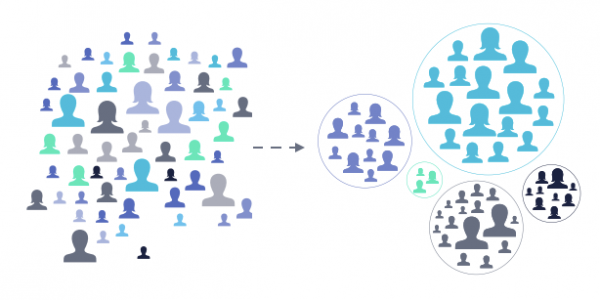

 Customer Segmentation is a practice of dividing a company's customers into groups that reflects the similarity among customers in each group. It can be done based on their needs, interests, priorities, by geography,etc.


With our dataset we are proceeding with RFM Segmentation.

# **Loading Packages**

We are loading the necessary packages for our code.

In [137]:
import os
import numpy as np
import datetime as dt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
!pip install openpyxl

from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

%matplotlib inline

Defaulting to user installation because normal site-packages is not writeable


# **Import des données**


In [161]:
# df=pd.read_excel("../input/online-retail-ii-data-set-from-ml-repository/online_retail_II.xlsx")
df = pd.read_csv('data/rfm_total.csv')

In [162]:
# df['last_order'] = df['last_order'].astype('datetime64')
df['last_order'] = pd.to_datetime(df['last_order'], format='%Y-%m-%d %H:%M:%S')
df.dtypes

customer_unique_id                object
period                             int64
last_order                datetime64[ns]
frequency                          int64
monetary_value                   float64
total_dep_by_customer            float64
nb_products_buy                    int64
volume_product_cm3               float64
fav_categ                        float64
eval_mean_per_customer           float64
nb_of_comment                    float64
fav_payment_type                 float64
satisfaction_client              float64
recency                            int64
Cluster                            int64
dtype: object

# Echantillon réduit
## Préparation

In [163]:
# Importer les bibliothèques nécessaires
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Copier le DataFrame original pour éviter de modifier les données d'origine
df1 = df.copy()

# Échantillonner un sous-ensemble de données pour des performances plus rapides
data_reduce = df1.sample(10000, random_state=1).copy()

# Créer une copie du sous-ensemble de données
X_r = data_reduce.copy()

# Séparer les colonnes catégorielles et numériques
categorical_columns = X_r.select_dtypes(['category']).columns
numerical_columns = X_r.select_dtypes(['int32','int64', 'float64']).columns

# Initialiser l'encodeur One-Hot
ohe = OneHotEncoder(sparse=False)

# Initialiser le standardiseur (pour normaliser les données numériques)
ss = StandardScaler()

# Standardiser les données numériques
X_r[numerical_columns] = ss.fit_transform(X_r[numerical_columns])

# Adapter l'encodeur One-Hot aux colonnes catégorielles et les transformer
ohe.fit(X_r[categorical_columns])

# Créer un nouveau DataFrame en fusionnant les données numériques standardisées
# avec les colonnes encodées en utilisant les noms de colonnes générés par l'encodeur One-Hot
X_r = pd.merge(
    X_r[numerical_columns],  # Les données numériques standardisées
    pd.DataFrame(
        ohe.transform(X_r[categorical_columns]),  # Les colonnes catégorielles encodées
        columns=ohe.get_feature_names(categorical_columns),  # Noms de colonnes générés par l'encodeur
        index=X_r.index  # Conserver l'index d'origine
    ),
    left_index=True,  # Utiliser l'index de gauche pour la fusion
    right_index=True  # Utiliser l'index de droite pour la fusion
)


In [164]:
X_r

period  frequency  monetary_value  total_dep_by_customer  \
22515 -1.081942    0.96650        0.029081               0.170608   
15458  0.874211   -0.26049        1.435369               0.348394   
16263  0.874211   -0.26049       -0.384821              -0.196239   
90850 -1.206802   -0.26049       -0.643051              -0.273506   
13789 -1.061132   -0.26049        0.120488              -0.045042   
...         ...        ...             ...                    ...   
85024  0.978261   -0.26049        0.890748               0.185434   
24489  0.915831   -0.26049        0.322448               0.015388   
4683   0.895021   -0.26049       -0.522211              -0.237349   
82574 -1.165182   -0.26049       -0.407074              -0.202898   
52724  0.915831   -0.26049       -0.216368              -0.145835   

       nb_products_buy  volume_product_cm3  fav_categ  eval_mean_per_customer  \
22515          0.96650            0.043087   1.009769                0.687263   
15458         -0.26049           -0.213444  -1.619362                0.687263   
16263         -0.26049           -0.297741  -0.193393               -0.065794   
90850         -0.26049           -0.332404   1.499946               -2.324964   
13789         -0.26049           -0.230481  -0.460762                0.687263   
...                ...                 ...        ...                     ...   
85024         -0.26049           -0.313133   0.341346                0.687263   
24489         -0.26049            0.498018  -0.193393               -1.571908   
4683          -0.26049            0.924684   1.009769                0.687263   
82574         -0.26049           -0.335135   1.143454               -0.065794   
52724         -0.26049            0.039445   0.786961                0.687263   

       nb_of_comment  fav_payment_type  satisfaction_client   recency  \
22515      -0.602273         -1.238276             0.547924  0.804595   
15458      -0.602273          0.079880             0.547924 -0.569365   
16263      -0.602273          0.079880             0.547924 -0.497051   
90850       0.570377         -1.238276            -1.825070  1.981336   
13789       0.570377          0.079880             0.547924  0.443027   
...              ...               ...                  ...       ...   
85024      -0.602273          0.079880             0.547924 -1.522591   
24489       0.570377         -1.238276            -1.825070 -0.924360   
4683        0.570377          0.079880             0.547924 -0.694271   
82574      -0.602273          0.079880             0.547924  1.422548   
52724      -0.602273          0.079880             0.547924 -0.937508   

        Cluster  
22515  1.236894  
15458 -0.877997  
16263 -0.877997  
90850  0.179448  
13789  1.236894  
...         ...  
85024 -0.877997  
24489  0.179448  
4683  -0.877997  
82574  1.236894  
52724 -0.877997  

[10000 rows x 13 columns]

## PCA Transformation 

In [165]:
pca_r = PCA(random_state=1)

In [166]:
pca_r.fit(X_r)

PCA(random_state=1)

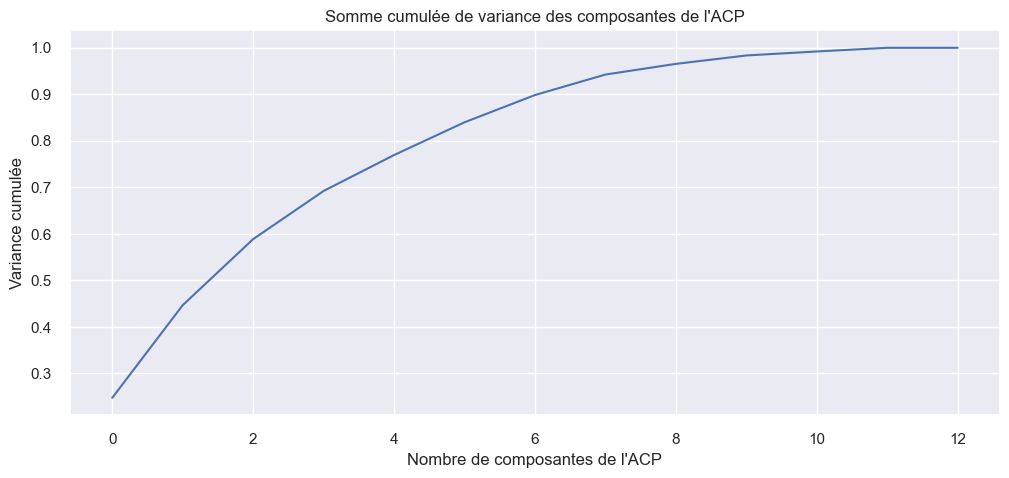

In [167]:
plt.figure(figsize=(12,5))
plt.title('Somme cumulée de variance des composantes de l\'ACP')
plt.xlabel('Nombre de composantes de l\'ACP')
plt.ylabel('Variance cumulée')
plt.plot(list(range(X_r.shape[1])),
         np.cumsum(pca_r.explained_variance_ratio_))

In [169]:
np.cumsum(pca_r.explained_variance_ratio_)[7]

0.9425209853751074

avec 7 features on a 94 % de la variance totale

In [170]:
colonnes_pca_r = X_r.columns

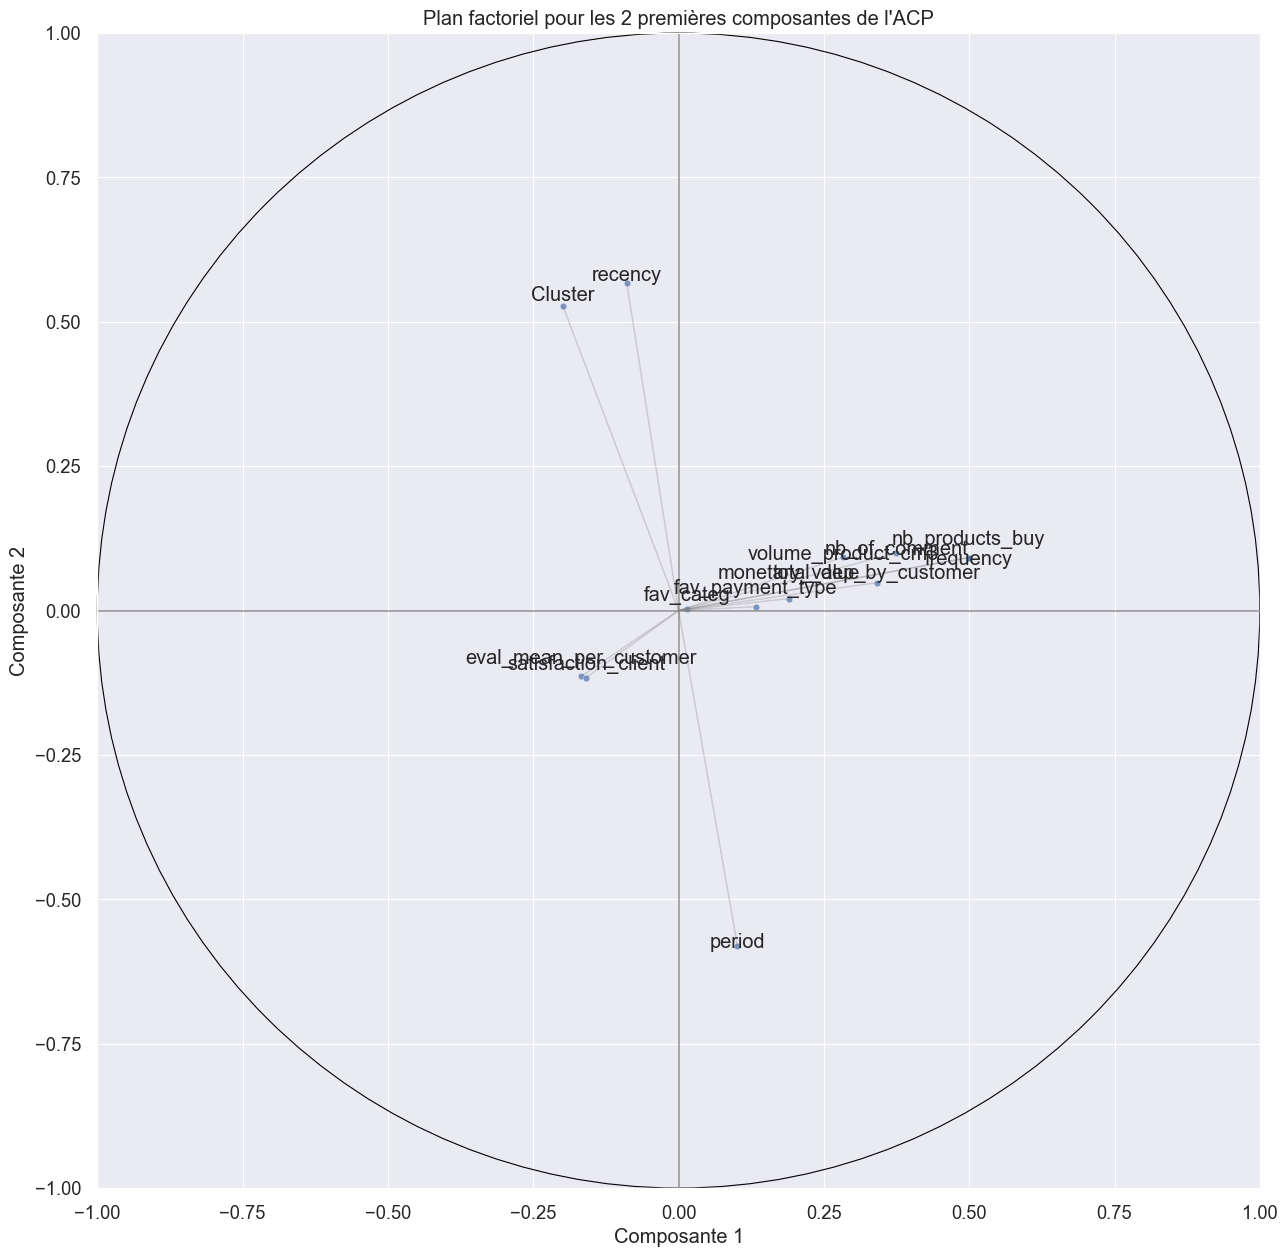

In [172]:
from matplotlib.patches import Circle
sns.set_context("paper", font_scale=1.5) 
plt.figure(figsize=(15,15))
chaine = "Plan factoriel pour les 2 premières composantes de l'ACP"
plt.title(chaine)
plt.xlabel('Composante 1')
plt.ylabel('Composante 2')
ax = plt.gca()
ax.add_patch(Circle([0,0], radius=1, color='black', fill=False, linestyle='-', 
                    clip_on=False))
ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
x_pca = pca_r.components_[0,:]
y_pca = pca_r.components_[1,:]

sns.scatterplot(x = x_pca,
                y = y_pca,
               alpha = 0.7)
plt.plot([-1,1],[0,0], color='grey', alpha=0.8)
plt.plot([0,0],[-1,1], color='grey', alpha=0.8)

i = 0
for x,y,colonne in zip(x_pca,y_pca, colonnes_pca_r):

    plt.annotate(colonne, 
                 (x,y), 
                 textcoords="offset points", 
                 xytext=(0,5+np.random.randint(-10,10)),
                 ha='center') 
    ax.arrow(0, 0, x, y, head_width=0, head_length=0, fc='grey', ec='grey',
             alpha=0.2)


sns.set_context("paper", font_scale=1) 

In [173]:
x_show = pca_r.transform(X_r.select_dtypes(['float64','int64']))[:,0]

y_show = pca_r.transform(X_r.select_dtypes(['float64','int64']))[:,1]

z_show = pca_r.transform(X_r.select_dtypes(['float64','int64']))[:,2]

In [175]:
X_pca_r = pca_r.transform(X_r)[:,:7]

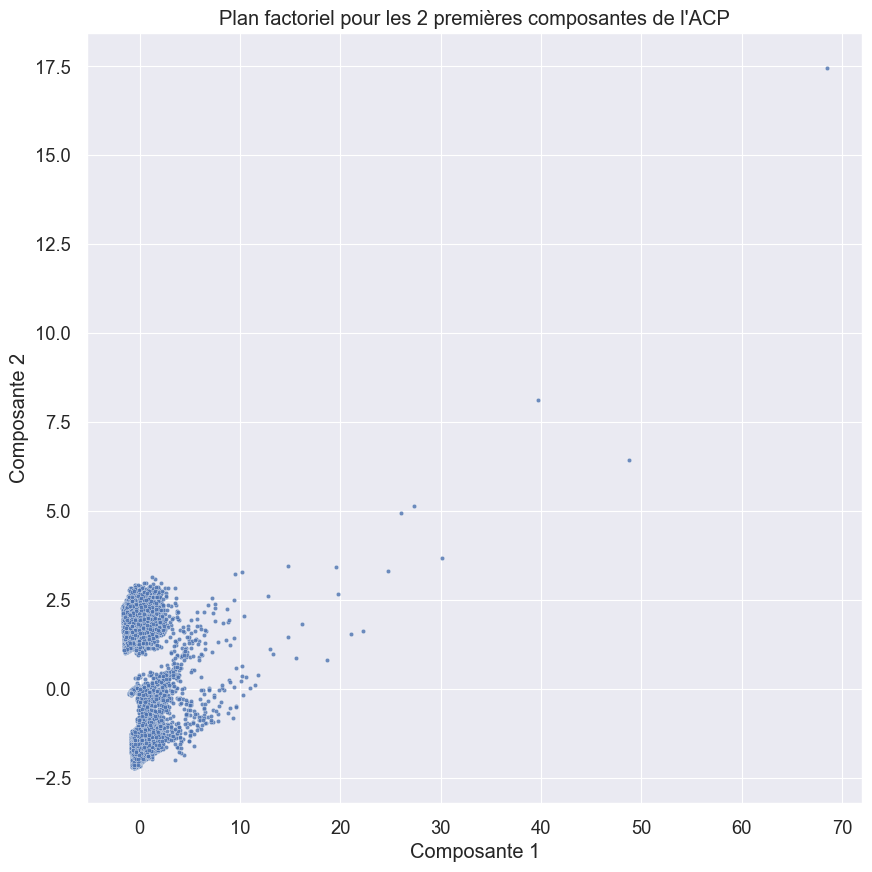

In [176]:
sns.set_context("paper", font_scale=1.5) 
plt.figure(figsize=(10,10))
chaine = "Plan factoriel pour les 2 premières composantes de l'ACP"
plt.title(chaine)
plt.xlabel('Composante 1')
plt.ylabel('Composante 2')
ax = plt.gca()

sns.scatterplot(x = x_show,
                y = y_show,
                #hue = hue_show,
                alpha=0.8, s=10)

sns.set_context("paper", font_scale=1) 

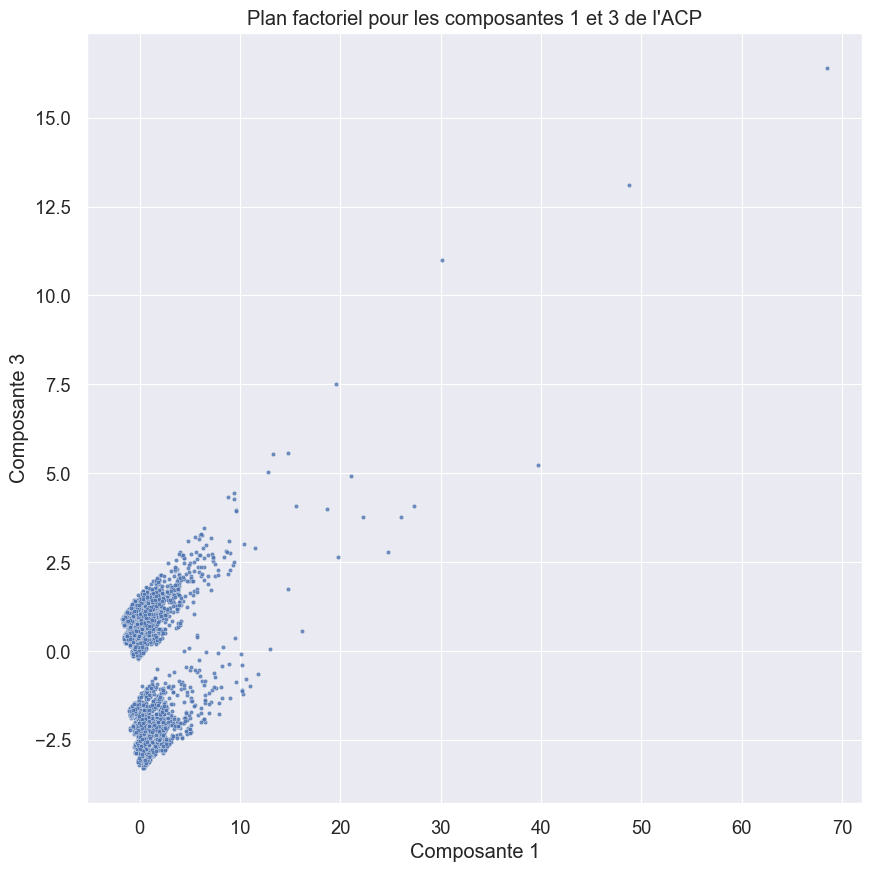

In [177]:
sns.set_context("paper", font_scale=1.5) 
plt.figure(figsize=(10,10))
chaine = "Plan factoriel pour les composantes 1 et 3 de l'ACP"
plt.title(chaine)
plt.xlabel('Composante 1')
plt.ylabel('Composante 3')
ax = plt.gca()

sns.scatterplot(x = x_show,
                y = z_show,
                #hue = hue_show,
                alpha=0.8, s=10)
sns.set_context("paper", font_scale=1) 


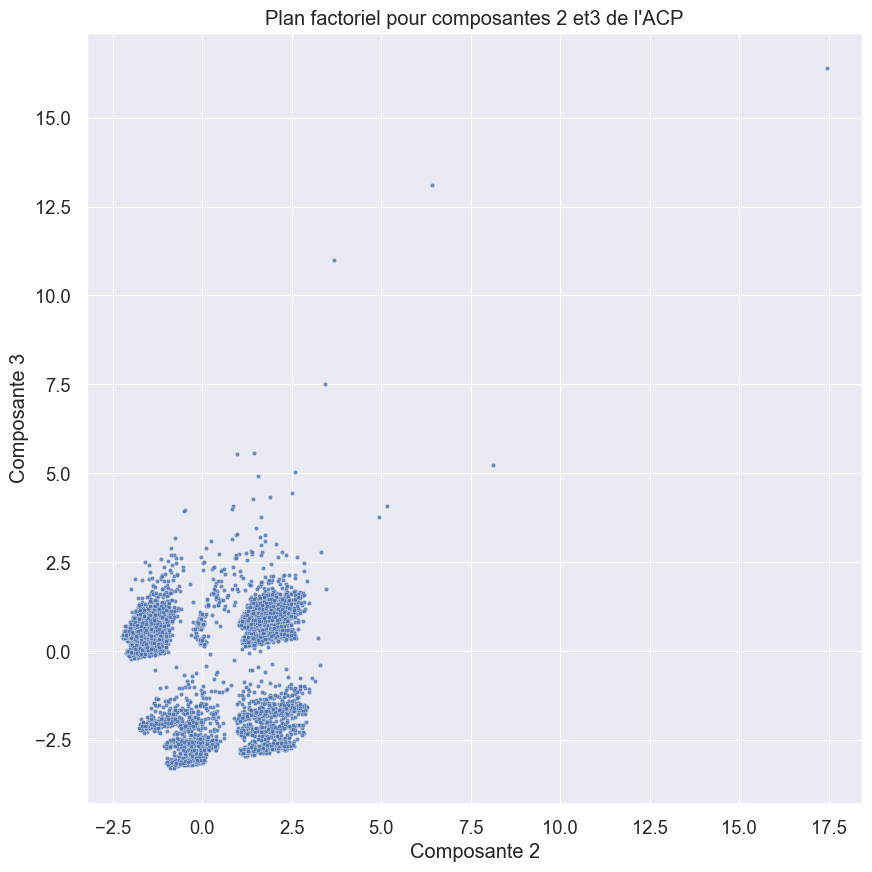

In [178]:
from matplotlib.patches import Circle
sns.set_context("paper", font_scale=1.5) 
plt.figure(figsize=(10,10))
chaine = "Plan factoriel pour composantes 2 et3 de l'ACP"
plt.title(chaine)
plt.xlabel('Composante 2')
plt.ylabel('Composante 3')
ax = plt.gca()

sns.scatterplot(x = y_show,
                y = z_show,
                #hue = hue_show,
                alpha=0.8, s=10)

sns.set_context("paper", font_scale=1) 

## Kmeans

# Premier essai

In [234]:
# Importez la classe KMeans du module sklearn.cluster
from sklearn.cluster import KMeans

# Créez une instance de KMeans avec 5 clusters, activez la sortie verbose pour voir les détails
# de l'ajustement du modèle, et fixez la graine aléatoire pour la reproductibilité.
kmeans_1e = KMeans(n_clusters=5, verbose=1, random_state=0)

# Ajustez le modèle KMeans aux données X_pca_r (résultat de l'ACP)
kmeans_1e.fit(X_pca_r)

# Obtenez les étiquettes de cluster attribuées à chaque échantillon après l'ajustement du modèle.
# Ces étiquettes indiquent à quel cluster chaque échantillon appartient.
cluster_labels = kmeans_1e.labels_

Initialization complete
Iteration 0, inertia 92562.17931383362
Iteration 1, inertia 78777.02115424702
Iteration 2, inertia 76975.10395799049
Iteration 3, inertia 75956.53484864531
Iteration 4, inertia 75370.87411380885
Iteration 5, inertia 75083.06233939409
Iteration 6, inertia 75034.70572180887
Iteration 7, inertia 74985.56015027847
Iteration 8, inertia 74910.63381394395
Iteration 9, inertia 74802.09180704768
Iteration 10, inertia 74668.77373837073
Iteration 11, inertia 74503.24176885051
Iteration 12, inertia 74190.06197974853
Iteration 13, inertia 74124.12957321253
Iteration 14, inertia 74122.238575095
Iteration 15, inertia 74122.1541030109
Iteration 16, inertia 74122.03602174591
Iteration 17, inertia 74121.93279909492
Converged at iteration 17: strict convergence.
Initialization complete
Iteration 0, inertia 77226.83812341781
Iteration 1, inertia 58281.49203923356
Iteration 2, inertia 57315.96327251462
Iteration 3, inertia 57222.611070822466
Iteration 4, inertia 57205.109421505615
I

### Recherche d'un optimum du nombre de clusters

NB : intertia = Sum of squared distances of samples to their closest cluster center.

In [218]:
# inertia = {}
# dict_kmeans = {}
# for k in range(1,25):
#     print(k)
#     kmeans_1s = KMeans(n_clusters=k,
#                    verbose=1,
#                    random_state=0).fit(X_pca_r)
#     inertia[k] = kmeans_1s.inertia_
#     dict_kmeans[k] = kmeans_1s
# inertia = {}
# dict_kmeans = {}

nb_boucles=3
max_clusters = 10

for k in range(1,nb_boucles+1):
    print('Boucle ',k)
    for i in range(1,max_clusters+1):
        kmeans_ns = KMeans(n_clusters=i,
                       verbose=1).fit(X_pca_r)
        inertia[(k,i)] = kmeans_ns.inertia_
        dict_kmeans[k,i] = kmeans_ns

Boucle  1
Initialization complete
Iteration 0, inertia 157032.58777339887.
Iteration 1, inertia 116802.38607629479.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 183443.70330880416.
Iteration 1, inertia 116802.38607629479.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 149784.28561661413.
Iteration 1, inertia 116802.38607629479.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 283399.6557675936.
Iteration 1, inertia 116802.38607629479.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 183029.80394049527.
Iteration 1, inertia 116802.38607629479.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 207319.00792422457.
Iteration 1, inertia 116802.38607629479.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 180319.77985113073.
Iteration 1, i

Iteration 5, inertia 80490.23214759603
Iteration 6, inertia 80307.7627148102
Iteration 7, inertia 80121.65638962417
Iteration 8, inertia 79856.0279998446
Iteration 9, inertia 79600.88985279354
Iteration 10, inertia 79533.43314061737
Iteration 11, inertia 79531.28292974428
Converged at iteration 11: strict convergence.
Initialization complete
Iteration 0, inertia 95250.36050114383
Iteration 1, inertia 77633.76173238095
Iteration 2, inertia 77558.86448385392
Iteration 3, inertia 77553.56737653201
Converged at iteration 3: center shift 0.00011003908602150267 within tolerance 0.00016686055153756406.
Initialization complete
Iteration 0, inertia 103515.72902626792
Iteration 1, inertia 68279.53754569001
Iteration 2, inertia 65501.54888782234
Iteration 3, inertia 65155.96314359511
Iteration 4, inertia 65135.280300351034
Iteration 5, inertia 65133.994263634566
Converged at iteration 5: center shift 1.850340023746935e-05 within tolerance 0.00016686055153756406.
Initialization complete
Iteration 

Initialization complete
Iteration 0, inertia 76424.54400258309
Iteration 1, inertia 53392.257766557
Iteration 2, inertia 53007.364292522536
Iteration 3, inertia 52971.32082607658
Iteration 4, inertia 52953.514223200786
Iteration 5, inertia 52949.27719232917
Iteration 6, inertia 52943.3724250913
Iteration 7, inertia 52942.67726607069
Converged at iteration 7: strict convergence.
Initialization complete
Iteration 0, inertia 77513.89353449346
Iteration 1, inertia 58498.08203894008
Iteration 2, inertia 55815.801786343465
Iteration 3, inertia 54156.27775182845
Iteration 4, inertia 51730.18277566024
Iteration 5, inertia 51066.44035273567
Iteration 6, inertia 50994.89620886463
Iteration 7, inertia 50986.19059798993
Iteration 8, inertia 50982.79737232822
Iteration 9, inertia 50982.23401128408
Converged at iteration 9: center shift 9.57664549898301e-05 within tolerance 0.00016686055153756406.
Initialization complete
Iteration 0, inertia 70880.50807800132
Iteration 1, inertia 55502.590014299174


Initialization complete
Iteration 0, inertia 61809.32734625201
Iteration 1, inertia 47631.214928885915
Iteration 2, inertia 46802.92947598491
Iteration 3, inertia 46672.003118559354
Iteration 4, inertia 46626.34355144759
Iteration 5, inertia 46615.7955972239
Iteration 6, inertia 46613.861494532895
Iteration 7, inertia 46611.57279412303
Iteration 8, inertia 46610.06716538786
Iteration 9, inertia 46609.49677011485
Iteration 10, inertia 46609.21119091628
Iteration 11, inertia 46609.015365709085
Converged at iteration 11: strict convergence.
Initialization complete
Iteration 0, inertia 66098.60419049929
Iteration 1, inertia 57980.11213322473
Iteration 2, inertia 56651.57867301992
Iteration 3, inertia 54992.836990140255
Iteration 4, inertia 54149.32313692263
Iteration 5, inertia 53656.98107239316
Iteration 6, inertia 53320.10364482114
Iteration 7, inertia 53017.09590339634
Iteration 8, inertia 52711.499318328875
Iteration 9, inertia 52347.12516363081
Iteration 10, inertia 51912.719141737354

Initialization complete
Iteration 0, inertia 54443.71145868189
Iteration 1, inertia 44728.5167635329
Iteration 2, inertia 43121.80497683694
Iteration 3, inertia 41627.4360994291
Iteration 4, inertia 41274.11613094407
Iteration 5, inertia 41226.430979224475
Iteration 6, inertia 41219.79216736318
Iteration 7, inertia 41217.45585161868
Iteration 8, inertia 41214.20492149133
Iteration 9, inertia 41212.95680805969
Iteration 10, inertia 41212.56078138075
Converged at iteration 10: strict convergence.
Initialization complete
Iteration 0, inertia 59804.95800854899
Iteration 1, inertia 44403.71998595427
Iteration 2, inertia 42669.0057240973
Iteration 3, inertia 40190.978932842045
Iteration 4, inertia 39535.2324451109
Iteration 5, inertia 38680.29020233434
Iteration 6, inertia 38440.07149588932
Iteration 7, inertia 38401.68699665106
Iteration 8, inertia 38388.72502280087
Iteration 9, inertia 38383.63910987405
Iteration 10, inertia 38379.55078582019
Iteration 11, inertia 38377.08664882578
Iterati

Iteration 4, inertia 93120.24742726606
Iteration 5, inertia 93105.3657779473
Iteration 6, inertia 93103.33684559057
Converged at iteration 6: center shift 3.6164892515051314e-05 within tolerance 0.00016686055153756406.
Initialization complete
Iteration 0, inertia 137834.40058002912
Iteration 1, inertia 99266.7327465973
Iteration 2, inertia 98033.98224960054
Iteration 3, inertia 98028.16835728846
Iteration 4, inertia 98020.149908387
Iteration 5, inertia 98018.44586174891
Converged at iteration 5: center shift 7.114674798829477e-05 within tolerance 0.00016686055153756406.
Initialization complete
Iteration 0, inertia 148483.31756720255
Iteration 1, inertia 100678.0402524245
Iteration 2, inertia 98606.82476736767
Iteration 3, inertia 98090.1901044127
Iteration 4, inertia 98034.50663260651
Iteration 5, inertia 98029.17694669099
Iteration 6, inertia 98021.61287451915
Iteration 7, inertia 98018.44586174891
Converged at iteration 7: center shift 7.11467479883003e-05 within tolerance 0.00016686

Initialization complete
Iteration 0, inertia 84694.52693495783
Iteration 1, inertia 64215.01248802055
Iteration 2, inertia 63197.684523914955
Iteration 3, inertia 62593.728215473704
Iteration 4, inertia 61994.785852130546
Iteration 5, inertia 61623.52009078966
Iteration 6, inertia 61613.78818657859
Converged at iteration 6: center shift 2.7117845654279263e-05 within tolerance 0.00016686055153756406.
Initialization complete
Iteration 0, inertia 81968.12570027575
Iteration 1, inertia 71011.11769061253
Iteration 2, inertia 66298.00467732074
Iteration 3, inertia 63744.691827036026
Iteration 4, inertia 62426.04424382344
Iteration 5, inertia 61910.92411950754
Iteration 6, inertia 61689.10570315123
Iteration 7, inertia 61618.398493800494
Iteration 8, inertia 61614.02916779516
Iteration 9, inertia 61613.70602406958
Converged at iteration 9: strict convergence.
Initialization complete
Iteration 0, inertia 88201.1900558008
Iteration 1, inertia 74467.19373494509
Iteration 2, inertia 72763.8140547

Iteration 20, inertia 49523.57764259594
Iteration 21, inertia 49523.25836220552
Iteration 22, inertia 49523.17114144456
Converged at iteration 22: strict convergence.
Initialization complete
Iteration 0, inertia 65946.62028264912
Iteration 1, inertia 53476.74272934694
Iteration 2, inertia 53103.79191497539
Iteration 3, inertia 53059.9419530759
Iteration 4, inertia 53035.19307628588
Iteration 5, inertia 52999.35285048864
Iteration 6, inertia 52880.072667287706
Iteration 7, inertia 52447.26993902085
Iteration 8, inertia 51636.50936315497
Iteration 9, inertia 51524.51681678333
Iteration 10, inertia 51524.19689663743
Converged at iteration 10: center shift 1.8517760630403496e-06 within tolerance 0.00016686055153756406.
Initialization complete
Iteration 0, inertia 64162.315921818685
Iteration 1, inertia 49096.46943251263
Iteration 2, inertia 47731.4328599215
Iteration 3, inertia 47470.03940361816
Iteration 4, inertia 47422.03861841811
Iteration 5, inertia 47416.778928316024
Iteration 6, ine

Iteration 2, inertia 46638.448927592166
Iteration 3, inertia 46159.28053935973
Iteration 4, inertia 46136.61431841483
Iteration 5, inertia 46123.504994123694
Iteration 6, inertia 46119.24076644371
Iteration 7, inertia 46117.50285507525
Iteration 8, inertia 46116.797641509955
Converged at iteration 8: strict convergence.
Initialization complete
Iteration 0, inertia 55597.15869501333
Iteration 1, inertia 45522.14692635546
Iteration 2, inertia 45161.10148321266
Iteration 3, inertia 45097.19714639775
Iteration 4, inertia 45067.38900804501
Iteration 5, inertia 45031.180377726174
Iteration 6, inertia 45014.70938178223
Iteration 7, inertia 45009.14010648838
Iteration 8, inertia 45007.247436127465
Converged at iteration 8: center shift 4.290872939233316e-05 within tolerance 0.00016686055153756406.
Initialization complete
Iteration 0, inertia 55966.36797028387
Iteration 1, inertia 45591.089817323926
Iteration 2, inertia 45176.39632038044
Iteration 3, inertia 45083.18319611259
Iteration 4, inert

Iteration 3, inertia 37349.17471262543
Iteration 4, inertia 36797.92617982766
Iteration 5, inertia 36619.30160964352
Iteration 6, inertia 36574.70625675356
Iteration 7, inertia 36573.502178444985
Iteration 8, inertia 36572.18473199149
Iteration 9, inertia 36571.33266962712
Iteration 10, inertia 36570.97582001897
Converged at iteration 10: strict convergence.
Initialization complete
Iteration 0, inertia 54537.255736135034
Iteration 1, inertia 40381.365557189565
Iteration 2, inertia 38284.29296587113
Iteration 3, inertia 37441.8595020955
Iteration 4, inertia 36867.67233018225
Iteration 5, inertia 36058.85334231324
Iteration 6, inertia 35926.31284068764
Iteration 7, inertia 35924.48074927838
Iteration 8, inertia 35923.370798433054
Iteration 9, inertia 35922.9676351684
Converged at iteration 9: strict convergence.
Boucle  3
Initialization complete
Iteration 0, inertia 185943.48430838334.
Iteration 1, inertia 116802.38607629479.
Converged at iteration 1: strict convergence.
Initialization c

Iteration 5, inertia 79851.30952566079
Iteration 6, inertia 79836.75959558197
Iteration 7, inertia 79818.6642350891
Iteration 8, inertia 79781.00240947219
Iteration 9, inertia 79709.8655808804
Iteration 10, inertia 79613.02999055135
Iteration 11, inertia 79553.56837294057
Iteration 12, inertia 79532.3074617852
Iteration 13, inertia 79531.51677076929
Iteration 14, inertia 79531.28292974428
Converged at iteration 14: strict convergence.
Initialization complete
Iteration 0, inertia 86785.8361154944
Iteration 1, inertia 67865.05509543866
Iteration 2, inertia 66670.5992364741
Iteration 3, inertia 65627.6696291771
Iteration 4, inertia 65512.347559433525
Iteration 5, inertia 65461.597342955756
Iteration 6, inertia 65373.29624694595
Iteration 7, inertia 65354.064684662706
Converged at iteration 7: center shift 1.758580894743601e-05 within tolerance 0.00016686055153756406.
Initialization complete
Iteration 0, inertia 85726.25974820156
Iteration 1, inertia 70328.63569968221
Iteration 2, inertia 

Iteration 22, inertia 52791.96914195048
Iteration 23, inertia 52789.746475693435
Iteration 24, inertia 52789.21295936082
Iteration 25, inertia 52789.15307329581
Converged at iteration 25: strict convergence.
Initialization complete
Iteration 0, inertia 68796.03888688635
Iteration 1, inertia 57178.16792735385
Iteration 2, inertia 55680.03525570541
Iteration 3, inertia 54932.7835922149
Iteration 4, inertia 54679.407824744136
Iteration 5, inertia 54609.19369623776
Iteration 6, inertia 54598.18186671876
Iteration 7, inertia 54597.791184605194
Converged at iteration 7: center shift 4.069267008303839e-06 within tolerance 0.00016686055153756406.
Initialization complete
Iteration 0, inertia 74466.4451533194
Iteration 1, inertia 59446.86676651338
Iteration 2, inertia 55993.569569189065
Iteration 3, inertia 54864.74734939143
Iteration 4, inertia 54646.09739777806
Iteration 5, inertia 54599.35253095091
Iteration 6, inertia 54598.07833458775
Iteration 7, inertia 54597.73402957566
Converged at iter

Initialization complete
Iteration 0, inertia 67927.49793992439
Iteration 1, inertia 53431.222757745265
Iteration 2, inertia 52082.060673466054
Iteration 3, inertia 51519.521389231726
Iteration 4, inertia 51441.997734023666
Iteration 5, inertia 51426.97290793187
Iteration 6, inertia 51424.688910299024
Iteration 7, inertia 51424.07356547743
Converged at iteration 7: center shift 2.980276594156386e-05 within tolerance 0.00016686055153756406.
Initialization complete
Iteration 0, inertia 63798.035685088194
Iteration 1, inertia 49524.67115349893
Iteration 2, inertia 48851.555855935134
Iteration 3, inertia 48679.56978062444
Iteration 4, inertia 48619.470976920806
Iteration 5, inertia 48590.850678606264
Iteration 6, inertia 48583.9527544562
Iteration 7, inertia 48579.34182853607
Iteration 8, inertia 48577.14725054775
Iteration 9, inertia 48575.28280724981
Iteration 10, inertia 48573.044608241325
Iteration 11, inertia 48570.10659613274
Iteration 12, inertia 48563.63906237633
Iteration 13, inert

Iteration 32, inertia 43772.69734382517
Iteration 33, inertia 43749.52554825968
Iteration 34, inertia 43722.50619491068
Iteration 35, inertia 43708.78803654133
Iteration 36, inertia 43697.652585130854
Iteration 37, inertia 43691.093947772424
Iteration 38, inertia 43686.86785110841
Iteration 39, inertia 43683.96665741485
Iteration 40, inertia 43683.70019931342
Converged at iteration 40: center shift 0.00011003113443076766 within tolerance 0.00016686055153756406.
Initialization complete
Iteration 0, inertia 52844.631821554125
Iteration 1, inertia 40591.24398346108
Iteration 2, inertia 39029.27207670701
Iteration 3, inertia 37508.07139164096
Iteration 4, inertia 37481.68867634637
Iteration 5, inertia 37459.37877716847
Iteration 6, inertia 37458.90562365907
Converged at iteration 6: strict convergence.
Initialization complete
Iteration 0, inertia 54055.1245036503
Iteration 1, inertia 39442.02110425904
Iteration 2, inertia 36502.54755256557
Iteration 3, inertia 35946.07150477676
Iteration 4

In [219]:
silhouettes_kmeans = {}
max_clusters = 3
for i in range(2,max_clusters):
    silhouettes_kmeans[i] = silhouette_score(X = X_pca_r, labels= list(dict_kmeans[(1,i)].labels_))

<Axes: title={'center': 'Représentation T-SNE de la séparation du jeu de données via KMeans (3 clusters)'}>

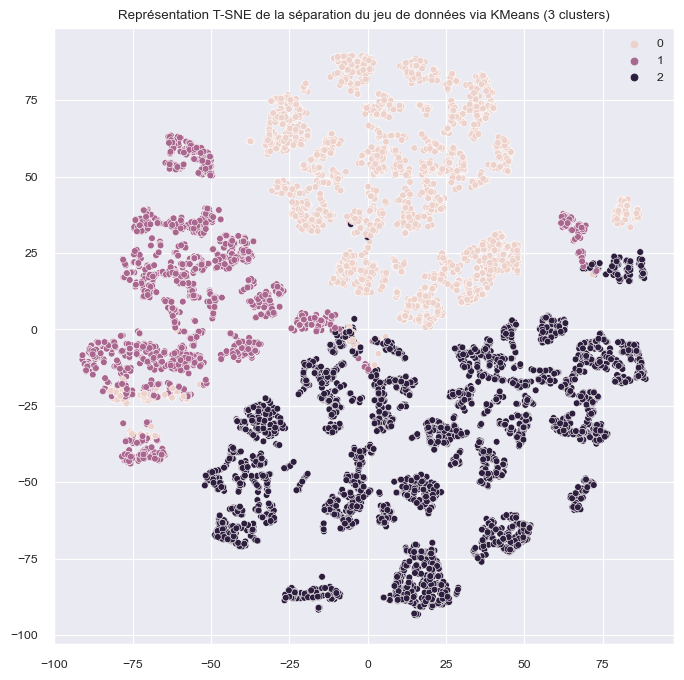

In [227]:
plt.figure(figsize=(8,8))
plt.title('Représentation T-SNE de la séparation du jeu de données via KMeans (3 clusters)')
sns.scatterplot(Tr[:,0], 
                Tr[:,1],
               hue=dict_kmeans[(1,3)].labels_,
               legend='full') 

## T-SNE

utilisons l'algorithme T-SNE pour avoir une idée en première approche du nombre de groupes homogènes

In [179]:
tsne = TSNE(n_components=2)
Tr = tsne.fit_transform(X_pca_r.copy())

<Axes: title={'center': 'Représentation du jeu de données via T-SNE'}>

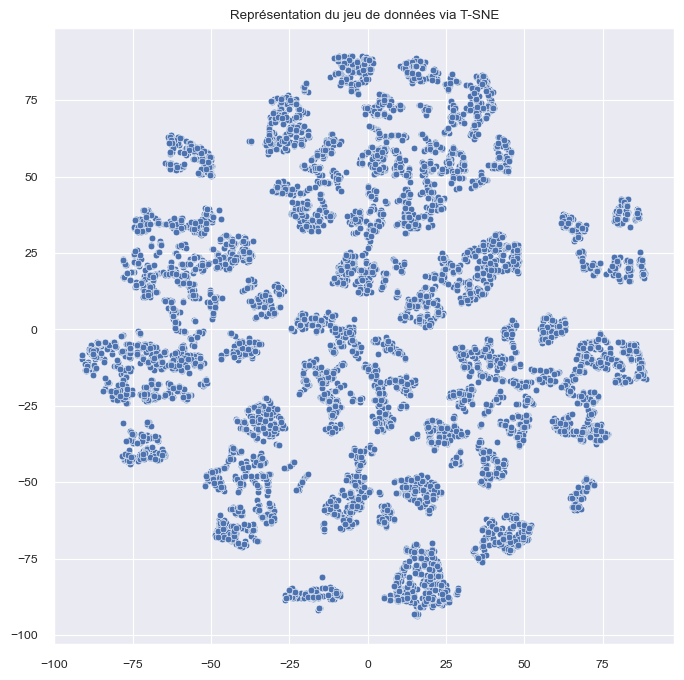

In [180]:
plt.figure(figsize=(8,8))
plt.title('Représentation du jeu de données via T-SNE')
sns.scatterplot(Tr[:,0], Tr[:,1])

## DBSCAN

### Application

In [181]:
dbs = DBSCAN(eps = 1, min_samples=5).fit(X_pca_r.copy())

<Axes: title={'center': 'Représentation de la séparation des données du DBSCAN via T-SNE'}>

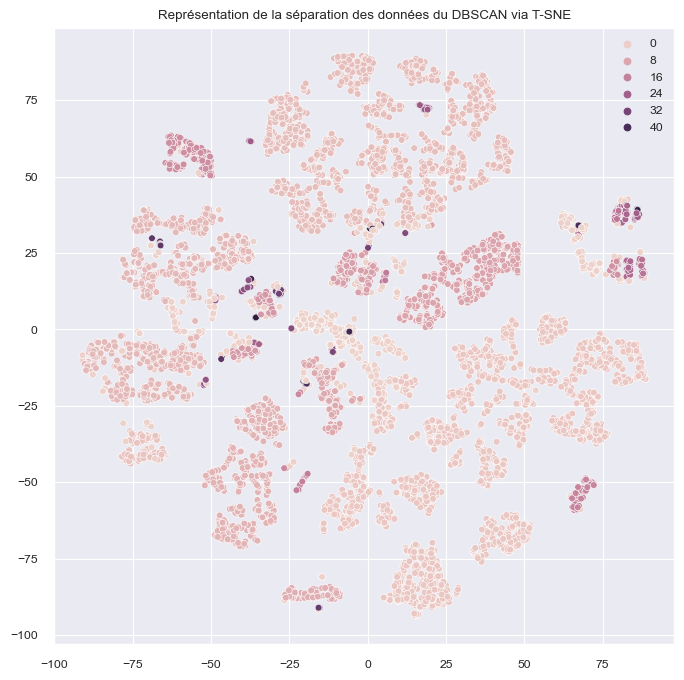

In [184]:
plt.figure(figsize=(8,8))
plt.title('Représentation de la séparation des données du DBSCAN via T-SNE')
sns.scatterplot(Tr[:,0], Tr[:,1], dbs.labels_)

## Clustering Hiérarchique

In [206]:
nb_clusters_agg = 3

In [211]:
ac = AgglomerativeClustering(n_clusters = nb_clusters_agg
                             ).fit(X_pca_r.copy())

In [212]:
from sklearn.cluster import AgglomerativeClustering

# Créez et ajustez le modèle AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters=nb_clusters_agg).fit(X_pca_r.copy())

# Obtenez les labels prédits à partir du modèle
labels_ = ac.labels_

# Créez un DataFrame avec les données
graph = pd.DataFrame(data={'X': Tr[:, 0], 'Y': Tr[:, 1], 'label_kmeans': labels_})


In [213]:
graph['x_pca'] = x_show
graph['y_pca'] = y_show
graph['z_pca'] = z_show

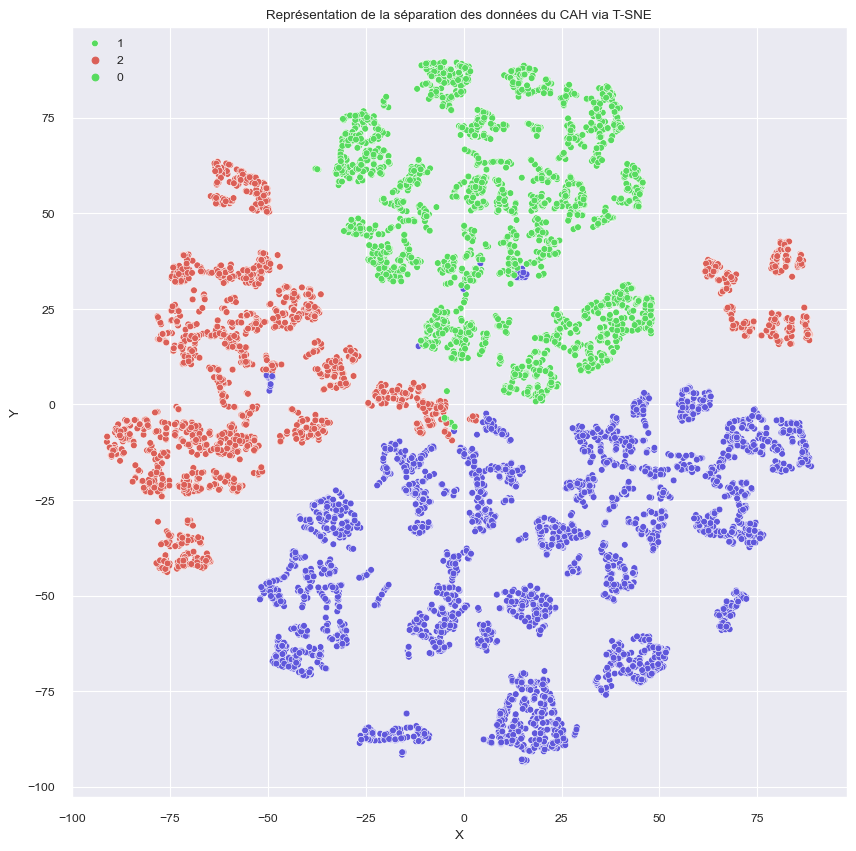

In [215]:
plt.figure(figsize=(10,10))
plt.title('Représentation de la séparation des données du CAH via T-SNE')
sns.scatterplot(graph['X'], 
                graph['Y'], 
                hue = ac.labels_, 
                legend='full',
               palette=sns.color_palette("hls",nb_clusters_agg))
plt.legend(loc='upper left', labels=graph['label_kmeans'].unique())
plt.show()

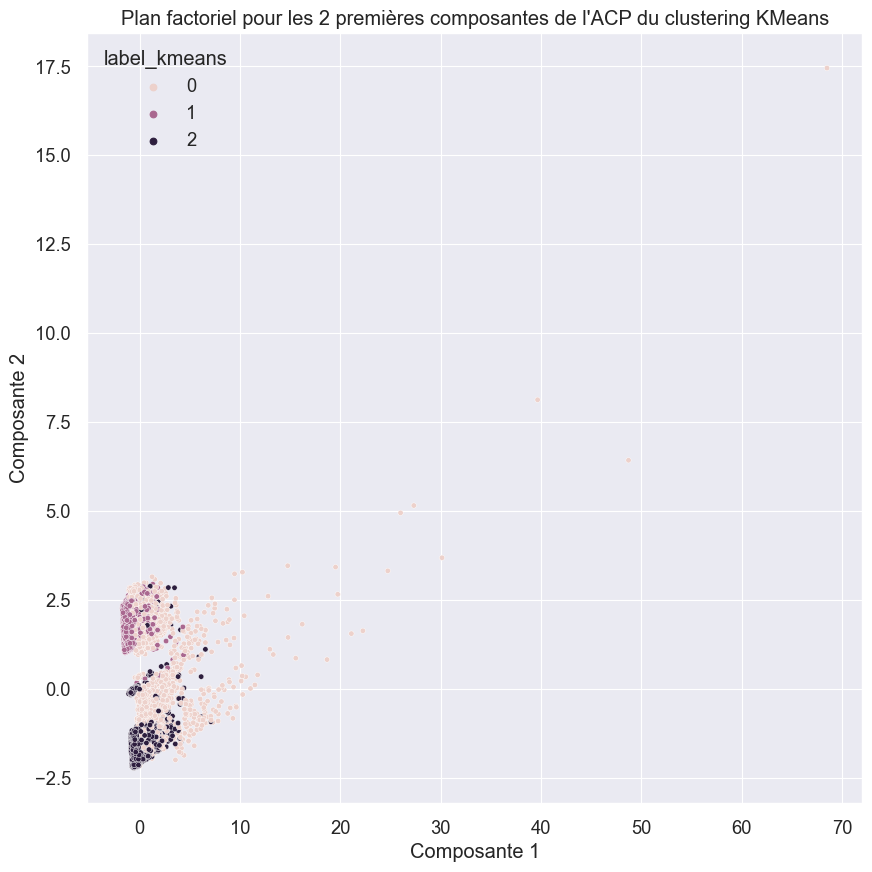

In [228]:
from matplotlib.patches import Circle
sns.set_context("paper", font_scale=1.5) 
plt.figure(figsize=(10,10))
chaine = "Plan factoriel pour les 2 premières composantes de l'ACP \
du clustering KMeans"
plt.title(chaine)
plt.xlabel('Composante 1')
plt.ylabel('Composante 2')
ax = plt.gca()

sns.scatterplot(x = graph['x_pca'], 
                y = graph['y_pca'], 
                hue = graph['label_kmeans'],
                alpha=1, s=15, legend='full')

sns.set_context("paper", font_scale=1) 

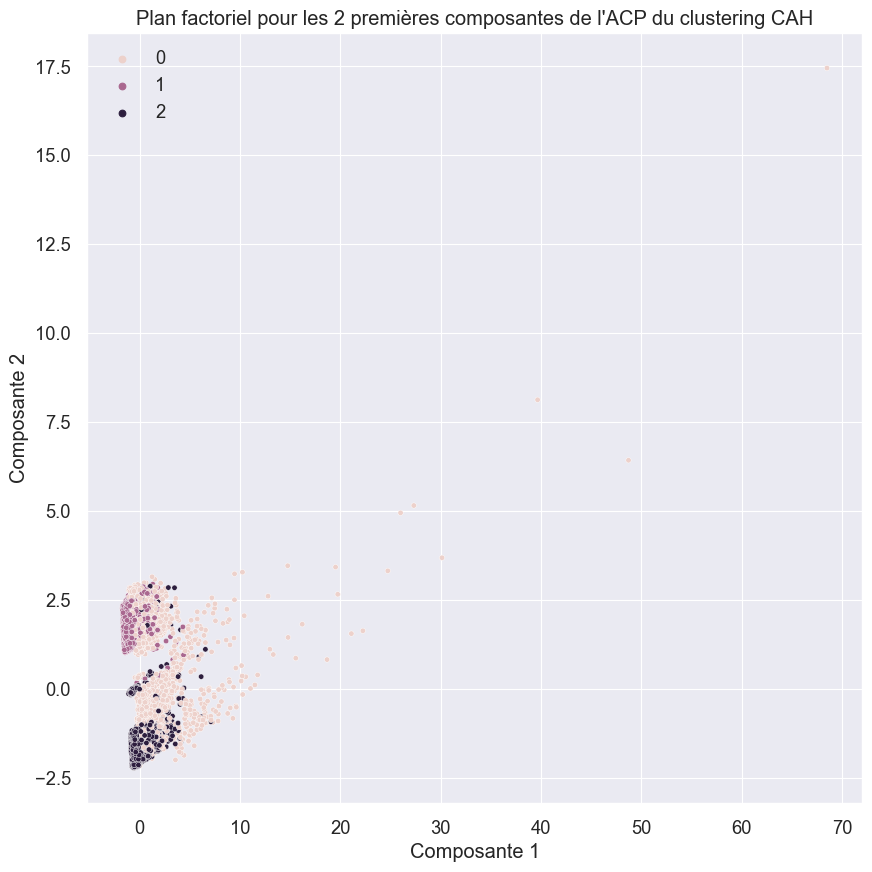

In [230]:
from matplotlib.patches import Circle
sns.set_context("paper", font_scale=1.5) 
plt.figure(figsize=(10,10))
chaine = "Plan factoriel pour les 2 premières composantes de l'ACP\
 du clustering CAH"
plt.title(chaine)
plt.xlabel('Composante 1')
plt.ylabel('Composante 2')
ax = plt.gca()

sns.scatterplot(x = graph['x_pca'], 
                y = graph['y_pca'], 
                hue = ac.labels_,
                alpha=1, s=15, legend='full')

sns.set_context("paper", font_scale=1) 

# Autre analyse 
## **RFM Analysis**

The first step in building an RFM model is to assign Recency, Frequency and Monetary values to each customer. So, RFM analysis can be carried out only on customers who have customerID.

**RFM Metrics**

**Recency**  : It is the amount of time since the customers most recent transaction. It is measured                 in days.
 
**Frequency**: Total number of transactions made by the customer.
 
**Monetary** : Total amount the customer has spent across all transactions.

In [40]:
# rfm.columns = ['recency', 'frequency', 'monetary']
# rfm = df[['recency', 'frequency', 'monetary_value']]
rfm = df.copy()
rfm = rfm[rfm["monetary_value"] > 0]
rfm.head()

customer_unique_id  period  last_order  frequency  \
0  baafa8da2de0fd753a885a5c15b11427  201806     81180.0          1   
1  d1588e9ace87e26a010ceb25775113e8  201802     54282.0          1   
2  d34394c17a8b789449feefeb97ac0620  201807     90255.0          1   
3  9136946b6b16453f79f2dfcef449486e  201706     13935.0          1   
4  3105d598604298481a38511105000bdd  201702      2425.0          1   

   monetary_value  total_dep_by_customer  nb_products_buy  volume_product_cm3  \
0          100.35                 100.35                1              7260.0   
1           73.34                  73.34                1             46656.0   
2           47.54                  47.54                1             39600.0   
3           53.33                  53.33                1              3840.0   
4           52.68                  52.68                1              2816.0   

   fav_categ  eval_mean_per_customer  nb_of_comment  fav_payment_type  \
0       12.0                     5.0            0.0               2.0   
1       13.0                     4.0            0.0               1.0   
2       55.0                     5.0            0.0               0.0   
3       45.0                     1.0            1.0               1.0   
4       73.0                     1.0            1.0               0.0   

   satisfaction_client  recency  Cluster  
0                  1.0       76        1  
1                  1.0      196        1  
2                  1.0       31        1  
3                  0.0      429        2  
4                  0.0      549        2

### **Calculate the score**

We need to assign a score from 1 to 5 to recency, frequency and monetary value individually for each customer.

Below is the **conversion** of columns into rfm scores between 1 to 5. 

**'5'** being the **highest** and **'1'** being the **least**.

- The higher the **monetary** value, higher is the score ie,'5' . 


- Smaller value of **recency** indicates recent purchases, so it takes the higher value of 5. 


- Frequency is the same as monetary, higher the **frequency**, higher the score.

In [41]:
# rfm["recency_score"] = pd.qcut(rfm['recency'], 5, labels=[5, 4, 3, 2, 1])


# rfm["frequency_score"] = pd.qcut(rfm['frequency'].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])

# rfm["monetary_score"] = pd.qcut(rfm['monetary'], 5, labels=[1, 2, 3, 4, 5])

# rfm['score']=rfm['recency_score'].astype(int)+rfm['frequency_score'].astype(int)+rfm['monetary_score'].astype(int)

# Calculer les scores de recency en divisant les données en 5 intervalles et en attribuant des étiquettes de score
rfm["recency_score"] = pd.qcut(rfm['recency'], 5, labels=[5, 4, 3, 2, 1])

# Calculer les scores de frequency en divisant les données en 5 intervalles et en attribuant des étiquettes de score
rfm["frequency_score"] = pd.qcut(rfm['frequency'].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])

# Calculer les scores de monetary en divisant les données en 5 intervalles et en attribuant des étiquettes de score
rfm["monetary_score"] = pd.qcut(rfm['monetary_value'], 5, labels=[1, 2, 3, 4, 5])

# Calculer le score total en additionnant les scores de recency, frequency et monetary
rfm['score'] = rfm['recency_score'].astype(int) + rfm['frequency_score'].astype(int) + rfm['monetary_score'].astype(int)


In [42]:
rfm.head()

customer_unique_id  period  last_order  frequency  \
0  baafa8da2de0fd753a885a5c15b11427  201806     81180.0          1   
1  d1588e9ace87e26a010ceb25775113e8  201802     54282.0          1   
2  d34394c17a8b789449feefeb97ac0620  201807     90255.0          1   
3  9136946b6b16453f79f2dfcef449486e  201706     13935.0          1   
4  3105d598604298481a38511105000bdd  201702      2425.0          1   

   monetary_value  total_dep_by_customer  nb_products_buy  volume_product_cm3  \
0          100.35                 100.35                1              7260.0   
1           73.34                  73.34                1             46656.0   
2           47.54                  47.54                1             39600.0   
3           53.33                  53.33                1              3840.0   
4           52.68                  52.68                1              2816.0   

   fav_categ  eval_mean_per_customer  nb_of_comment  fav_payment_type  \
0       12.0                     5.0            0.0               2.0   
1       13.0                     4.0            0.0               1.0   
2       55.0                     5.0            0.0               0.0   
3       45.0                     1.0            1.0               1.0   
4       73.0                     1.0            1.0               0.0   

   satisfaction_client  recency  Cluster recency_score frequency_score  \
0                  1.0       76        1             5               1   
1                  1.0      196        1             3               1   
2                  1.0       31        1             5               1   
3                  0.0      429        2             1               1   
4                  0.0      549        2             1               1   

  monetary_score  score  
0              3      9  
1              2      6  
2              1      7  
3              2      4  
4              1      3

In [43]:
unique_scores = rfm['score'].unique()
print(unique_scores)


[ 9  6  7  4  3  5  8 15 10 11 13 12 14]


### Best customers

With the help of score, we will be able to identify the best customers in our e-commerce company.

In [44]:
rfm[rfm['score']>= 15].sort_values('monetary_value', ascending=False).head()

customer_unique_id  period  last_order  frequency  \
35165  763c8b1c9c68a0229c42c9fc6f662b93  201807     86390.0          4   
48672  5d0a2980b292d049061542014e8960bf  201807     85937.0          2   
33598  a229eba70ec1c2abef51f04987deb7a5  201805     78034.0          2   
74842  9b11e010850a4045d2da80c7783fdbd1  201806     79265.0          2   
64368  adfa1cab2b2c8706db21bb13c0a1beb1  201806     78179.0          6   

       monetary_value  total_dep_by_customer  nb_products_buy  \
35165         7274.88               29099.52                4   
48672         4809.44                9618.88                2   
33598         4445.50                8891.00                2   
74842         3256.14                6512.28                2   
64368         3242.84               19457.04                6   

       volume_product_cm3  fav_categ  eval_mean_per_customer  nb_of_comment  \
35165             32000.0       72.0                     1.0            4.0   
48672            106470.0       27.0                     1.0            0.0   
33598             10335.0       67.0                     5.0            0.0   
74842              8192.0       21.0                     1.0            2.0   
64368             24576.0       69.0                     3.0            6.0   

       fav_payment_type  satisfaction_client  recency  Cluster recency_score  \
35165               0.0                  0.0       47        0             5   
48672               1.0                  0.0       50        0             5   
33598               2.0                  1.0       92        0             5   
74842               1.0                  0.0       85        0             5   
64368               1.0                  0.0       91        0             5   

      frequency_score monetary_score  score  
35165               5              5     15  
48672               5              5     15  
33598               5              5     15  
74842               5              5     15  
64368               5              5     15

The customers having a score of '15' are considered as the 'best customers' as they have have the highest recency, frequency and monetary score.

They are asset to the company.

### **Number of best customers** 

In [45]:
rfm[rfm['score']>=15].count()

customer_unique_id        1040
period                    1040
last_order                1040
frequency                 1040
monetary_value            1040
total_dep_by_customer     1040
nb_products_buy           1040
volume_product_cm3        1040
fav_categ                 1040
eval_mean_per_customer    1040
nb_of_comment             1040
fav_payment_type          1040
satisfaction_client       1040
recency                   1040
Cluster                   1040
recency_score             1040
frequency_score           1040
monetary_score            1040
score                     1040
dtype: int64

There are 349 Best customers in the company who are frequent buyers and also generate high revenue.

## **Separation des clients **

Nous allons **séparer** le niveau du client **en fonction du score**.

Ici, nous les avons classés en **4 niveaux**.

**Actif** : Génération de revenus élevés et acheteurs fréquents.

**Bon** : Clients dont les achats sont assez fréquents et génèrent des revenus modérés.

**Moyenne** : Clients moins actifs, acheteurs peu fréquents et générant de faibles revenus.

**Inactif** : Clients générant de très faibles revenus et acheteurs occasionnels.

In [46]:
# def rfm_level(score):
#     if  ((score >1) and (score < 4)):
#         return 'Inactif'
#     elif ((score >3) and (score < 8)):
#         return 'Moyen'
#     elif ((score > 7) and (score <11)):
#         return 'Bon'
#     else:
#         return 'Meilleur'
    
def rfm_level(score):
    if  (score >= 8):
        return 'Bon'
    elif (score >= 4):
        return 'Moyen'
    else:
        return 'Mauvais'
    

In [47]:
rfm['level'] = rfm['score'].apply(lambda score : rfm_level(score))
rfm.head()

customer_unique_id  period  last_order  frequency  \
0  baafa8da2de0fd753a885a5c15b11427  201806     81180.0          1   
1  d1588e9ace87e26a010ceb25775113e8  201802     54282.0          1   
2  d34394c17a8b789449feefeb97ac0620  201807     90255.0          1   
3  9136946b6b16453f79f2dfcef449486e  201706     13935.0          1   
4  3105d598604298481a38511105000bdd  201702      2425.0          1   

   monetary_value  total_dep_by_customer  nb_products_buy  volume_product_cm3  \
0          100.35                 100.35                1              7260.0   
1           73.34                  73.34                1             46656.0   
2           47.54                  47.54                1             39600.0   
3           53.33                  53.33                1              3840.0   
4           52.68                  52.68                1              2816.0   

   fav_categ  eval_mean_per_customer  nb_of_comment  fav_payment_type  \
0       12.0                     5.0            0.0               2.0   
1       13.0                     4.0            0.0               1.0   
2       55.0                     5.0            0.0               0.0   
3       45.0                     1.0            1.0               1.0   
4       73.0                     1.0            1.0               0.0   

   satisfaction_client  recency  Cluster recency_score frequency_score  \
0                  1.0       76        1             5               1   
1                  1.0      196        1             3               1   
2                  1.0       31        1             5               1   
3                  0.0      429        2             1               1   
4                  0.0      549        2             1               1   

  monetary_score  score    level  
0              3      9      Bon  
1              2      6    Moyen  
2              1      7    Moyen  
3              2      4    Moyen  
4              1      3  Mauvais

### Visualising number of customers for each level

<Axes: xlabel='level', ylabel='count'>

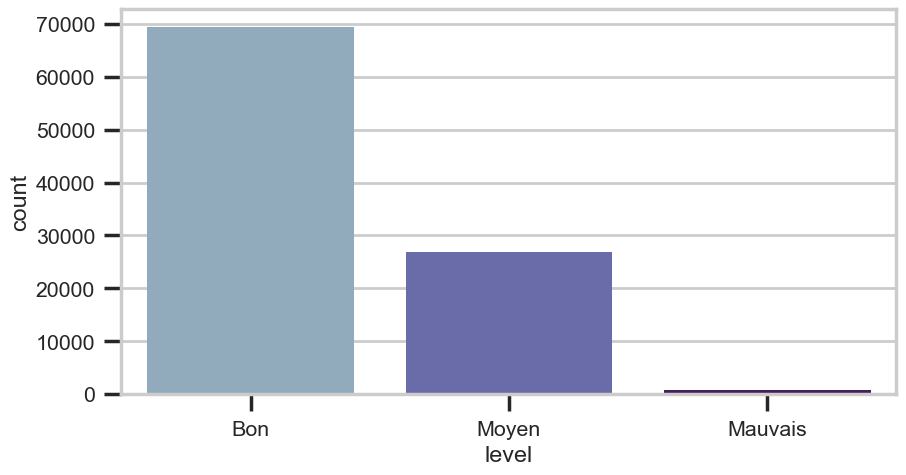

In [48]:
plt.figure(figsize=(10,5))
sns.set_context("poster", font_scale=0.7)
sns.set_palette('twilight')
sns.countplot(rfm['level'])

In [49]:
rfm.groupby('level').agg({
    'recency' : ['mean', 'min','max'],
    'frequency' : ['mean', 'min','max'],
    'monetary_value' : ['mean','min','max','count']
})

recency           frequency         monetary_value             \
               mean  min  max      mean min max           mean        min   
level                                                                       
Bon      198.776006    2  602  1.283776   1  38     190.463047   1.856818   
Mauvais  473.997593  387  603  1.000000   1   1      38.259928  14.620000   
Moyen    341.829975    3  603  1.045417   1  63      78.165943   1.737500   

                          
              max  count  
level                     
Bon      13664.08  69368  
Mauvais     53.01    831  
Moyen     6726.66  26796

**Bon (Bon Clients) :**
On peut dire que 52,574 clients ont acheté en moyenne 239,63 unités en faisant leurs achats environ tous les 148 jours. Ce sont des clients privilégiés. Vous pouvez envisager de proposer des offres spéciales ou des promotions pour les inciter à faire des achats plus fréquents.

**Moyen (Clients Moyens) :**
Environ 20,009 clients ont acheté en moyenne 90,00 unités en faisant leurs achats environ tous les 241 jours. Ces clients montrent un comportement d'achat moyen. Vous pouvez envisager d'envoyer des offres de fidélisation pour les encourager à acheter plus fréquemment.

**Mauvais (Clients Mauvais) :**
Environ 561 clients ont acheté en moyenne 40,19 unités en faisant leurs achats environ tous les 315 jours. Ce groupe de clients présente un comportement d'achat moins fréquent. Vous pourriez envisager de mettre en place des campagnes de réactivation pour les inciter à revenir plus souvent.

Ces résumés sont basés sur les statistiques de recency, frequency et monetary_value que vous avez fournies pour chaque groupe de clients. Ils donnent des indications sur la fréquence d'achat, le montant total dépensé et le temps écoulé depuis le dernier achat pour chaque groupe.

### Visualizing against each of the factors 

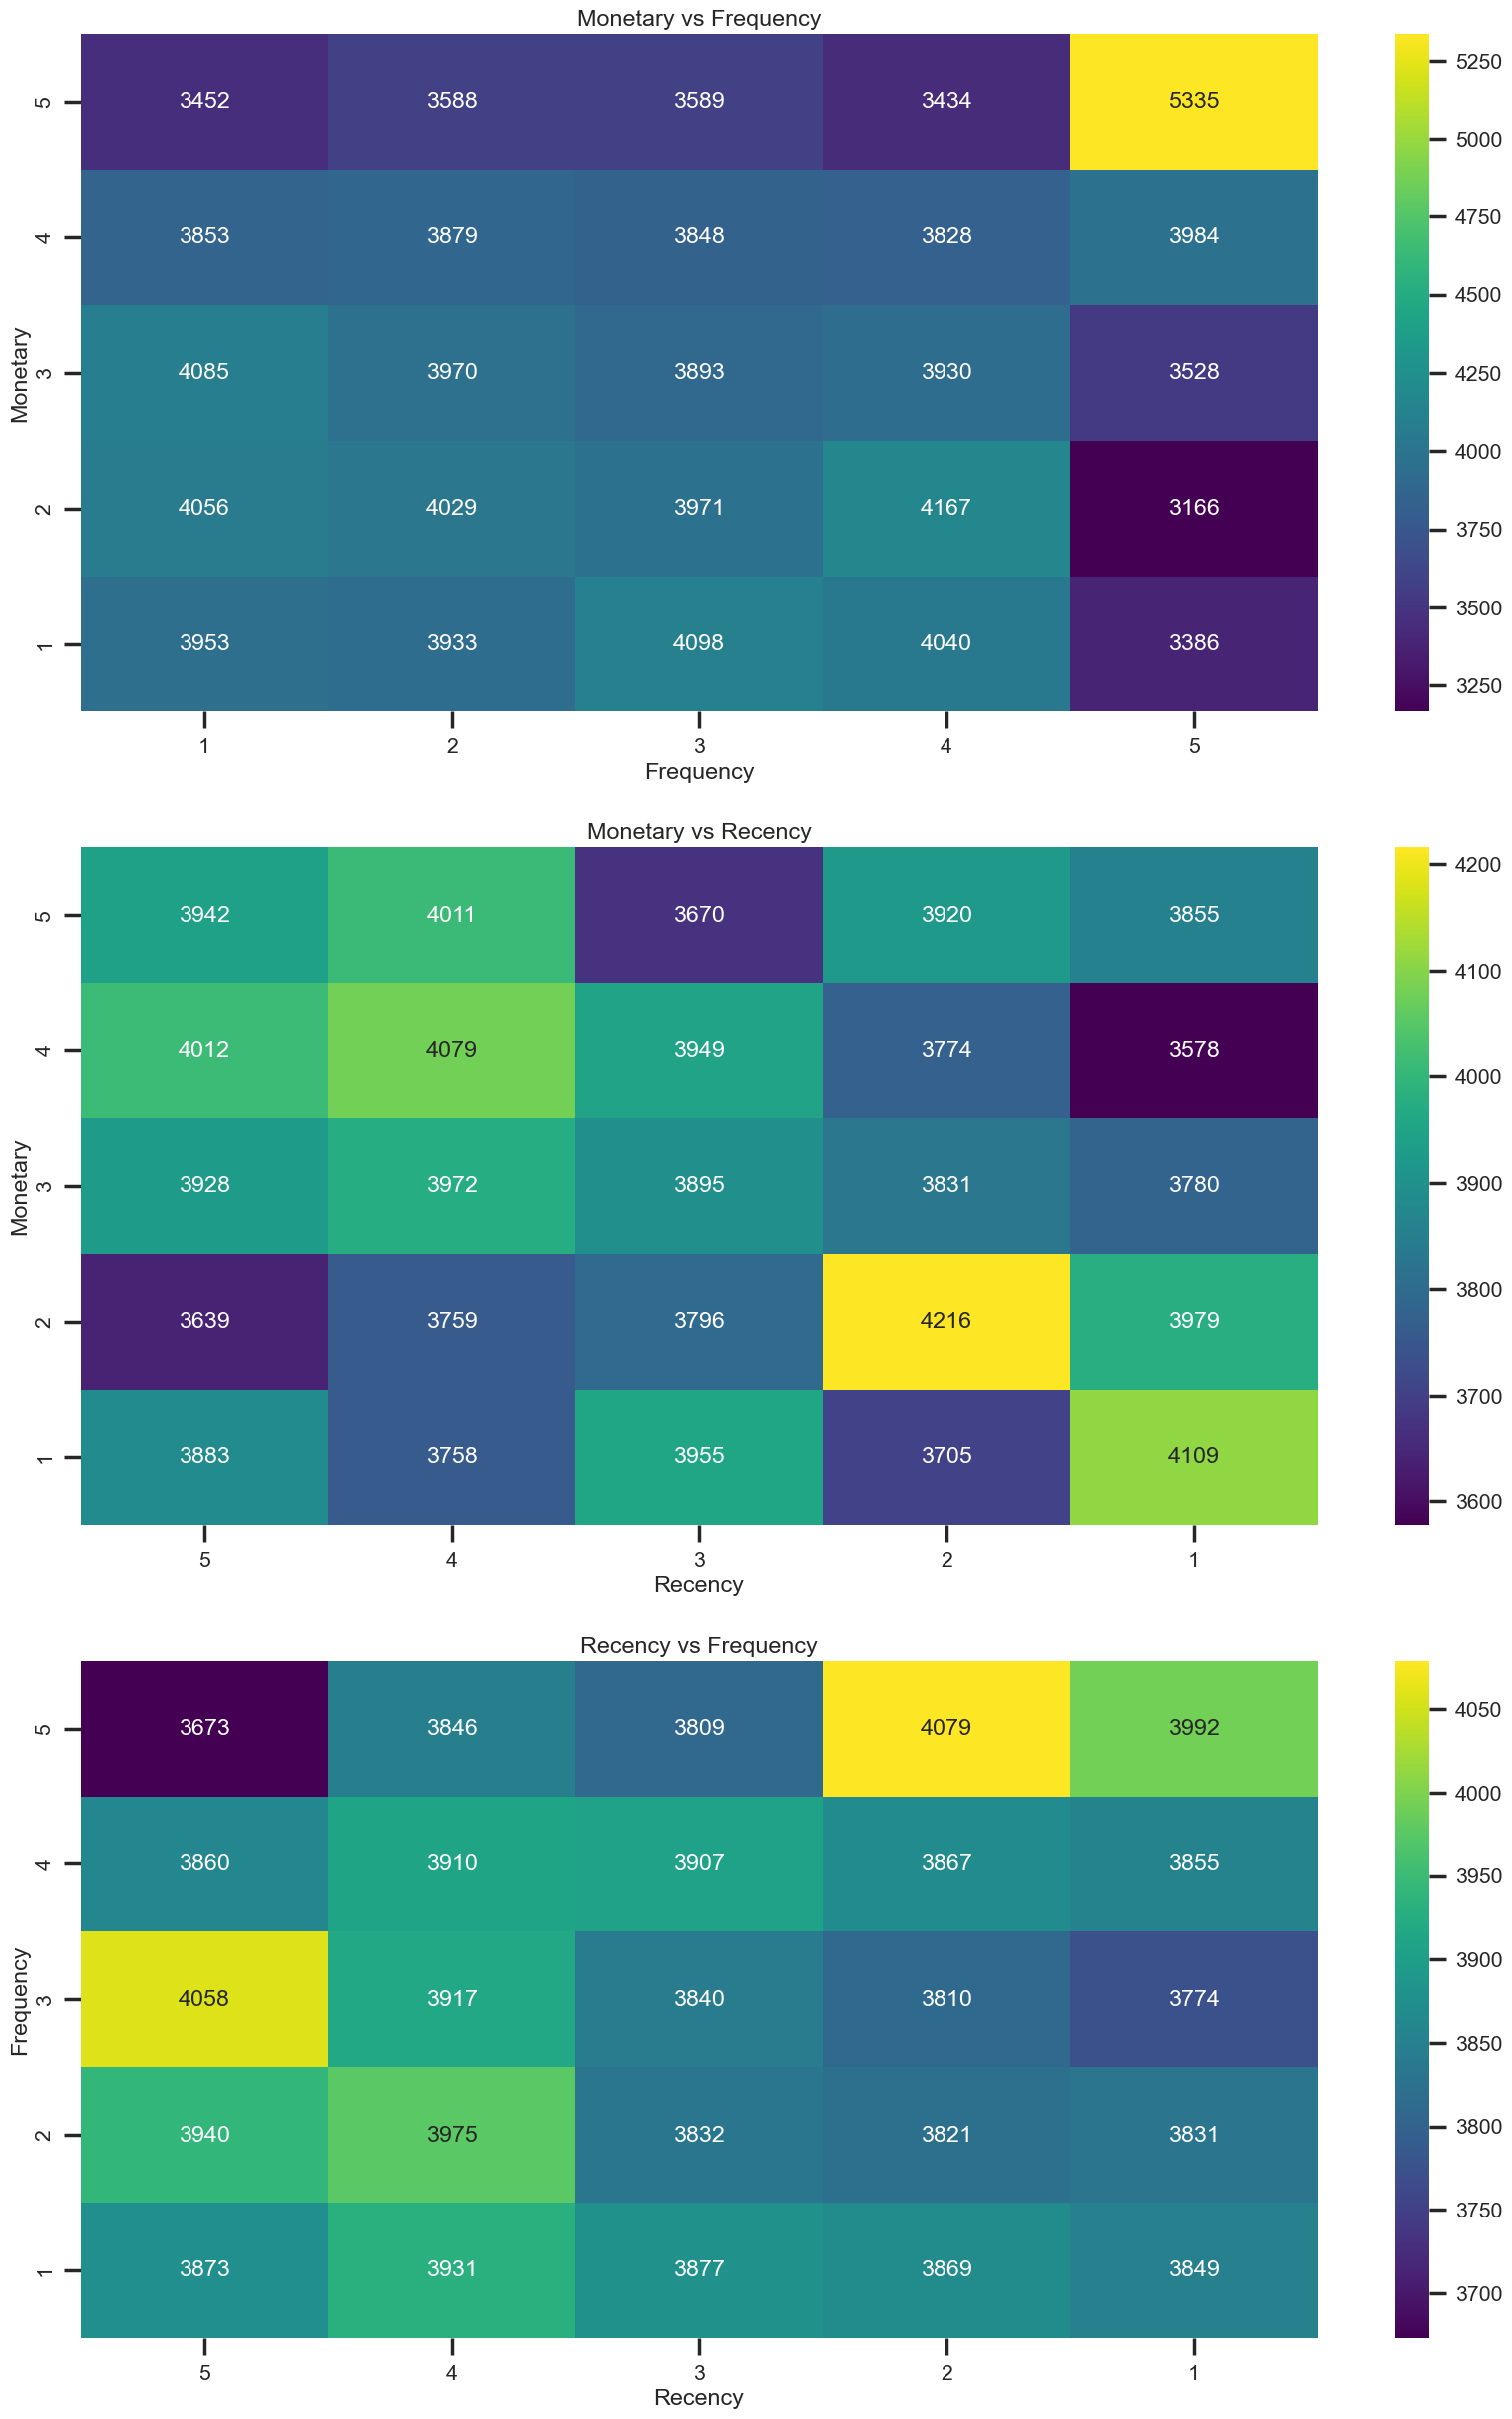

In [50]:
cross_table1 = pd.crosstab(index=rfm['monetary_score'], columns=rfm['frequency_score'])
cross_table2 = pd.crosstab(index=rfm['monetary_score'], columns=rfm['recency_score'])
cross_table3 = pd.crosstab(index=rfm['frequency_score'], columns=rfm['recency_score'])
plt.figure(figsize=(20,30))
plt.subplot(311)
ax1 = sns.heatmap(cross_table1, cmap='viridis', annot=True, fmt=".0f")
ax1.invert_yaxis()
ax1.set_ylabel('Monetary')
ax1.set_xlabel('Frequency')
ax1.set_title('Monetary vs Frequency')
plt.subplot(312)
ax2 = sns.heatmap(cross_table2, cmap='viridis', annot=True, fmt=".0f")
ax2.invert_yaxis()
ax2.set_ylabel('Monetary')
ax2.set_xlabel('Recency')
ax2.set_title('Monetary vs Recency')
plt.subplot(313)
ax3 = sns.heatmap(cross_table3, cmap='viridis', annot=True, fmt=".0f")
ax3.invert_yaxis()
ax3.set_ylabel('Frequency')
ax3.set_xlabel('Recency')
ax3.set_title('Recency vs Frequency')
plt.show()

### Segmenting customers based on their levels

In [51]:
bon = rfm[rfm['level'] == 'Bon']
moyen = rfm[rfm['level'] == 'Moyen']
mauvais = rfm[rfm['level'] == 'Mauvais']

#### Checking outliers

#### Outlier treatment for recency


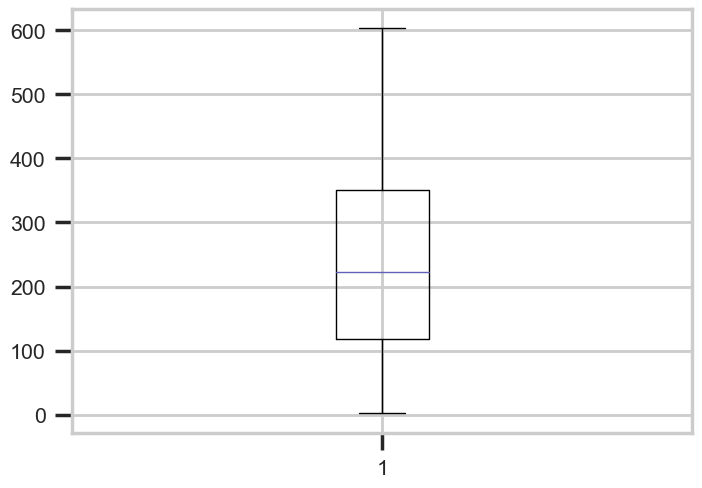

In [56]:
plt.boxplot(rfm.recency)
Q1 = rfm.recency.quantile(0.05)
Q3 = rfm.recency.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.recency >= Q1 - 1.5*IQR) & (rfm.recency <= Q3 + 1.5*IQR)]

#### Outlier treatment for frequency

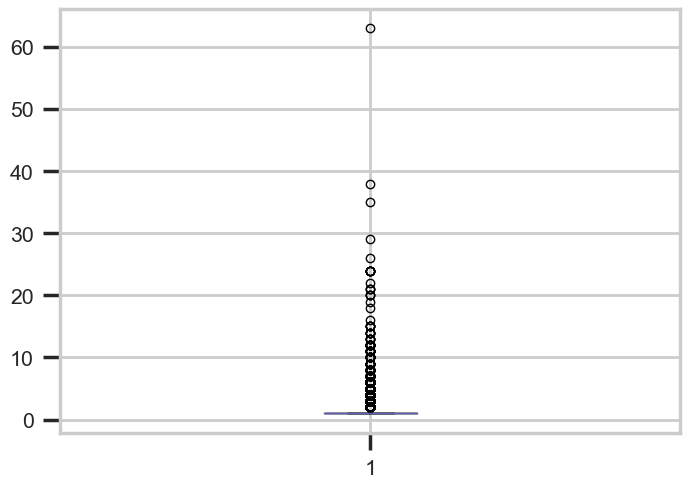

In [57]:
plt.boxplot(rfm.frequency)
Q1 = rfm.frequency.quantile(0.05)
Q3 = rfm.frequency.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.frequency >= Q1 - 1.5*IQR) & (rfm.frequency <= Q3 + 1.5*IQR)]

##### Outlier treatment for monetary

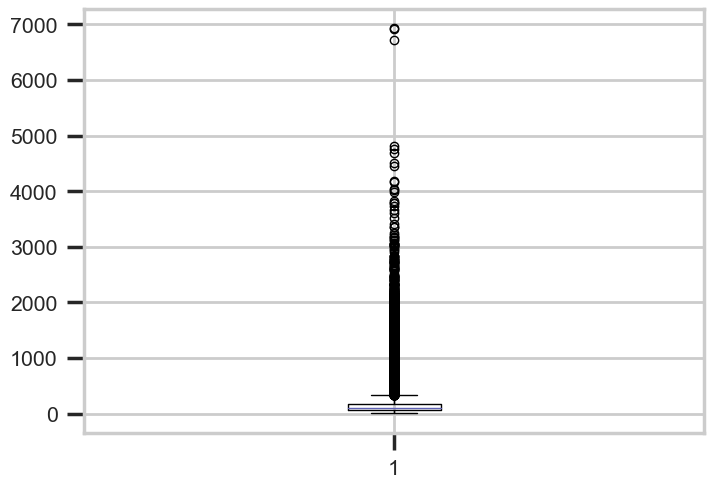

In [58]:
plt.boxplot(rfm.monetary_value)
Q1 = rfm.monetary_value.quantile(0.05)
Q3 = rfm.monetary_value.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.monetary_value >= (Q1 - 1.5*IQR)) & (rfm.monetary_value <= (Q3 + 1.5*IQR))]

## K Means

### Transforming the data

In [81]:
rfm1=rfm[['recency','frequency','monetary_value','score']]
scaler = StandardScaler()
x_scaled=scaler.fit(rfm1)
x_scaled = scaler.fit_transform(rfm1)
x_scaled

array([[-1.0851026 , -0.35362574, -0.30633605,  0.02348403],
       [-0.29224197, -0.35362574, -0.50966307, -1.1852047 ],
       [-1.38242534, -0.35362574, -0.70388141, -0.78230846],
       ...,
       [ 1.59080204,  2.15372107,  1.09346624,  0.82927651],
       [-1.03224523, -0.35362574, -0.37077438,  1.63506899],
       [ 1.28026496, -0.35362574,  0.17032693,  0.42638027]])

#### Elbow method

Nous allons **déterminer le nombre de clusters** à l'aide de la méthode Elbow.

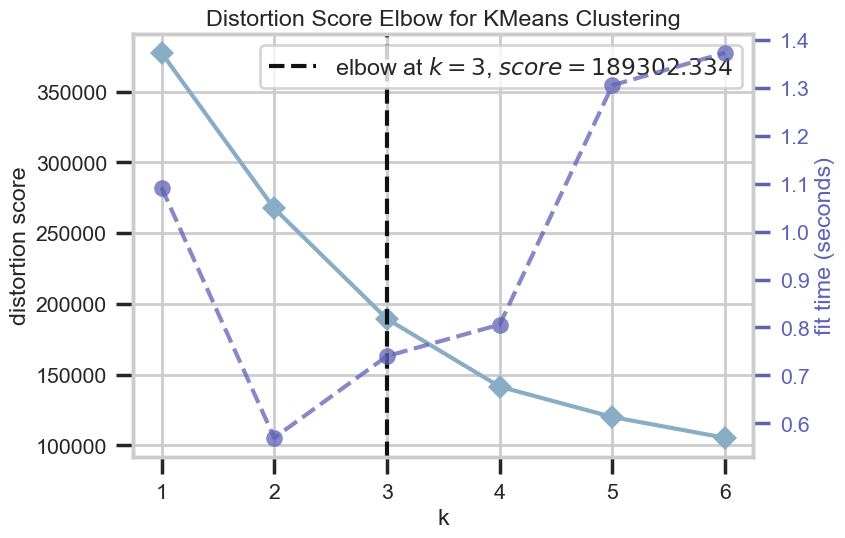

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [87]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,7))
visualizer.fit(x_scaled)  
visualizer.show()   

Selon la méthode Elbow, le nombre de clusters est de **3**.

### Recherche du meilleur parametre avec GridSearchCV

In [88]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_rand_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

# Supprimer les lignes avec des valeurs manquantes (NaN)
rfm_df = df.dropna()

# Remplacer les valeurs infinies par des valeurs finies
rfm_df = rfm_df.replace([np.inf, -np.inf], np.nan)
rfm_df = rfm_df.fillna(rfm_df.mean())

# Sélectionner les colonnes numériques
cols = ['frequency', 'monetary_value','recency']

# Données normalisées
scaler = StandardScaler()
data = scaler.fit_transform(rfm_df[cols])

# Paramètres à tester
param_grid = {
    'n_clusters': [3, 4, 5, 6],  # Différents nombres de clusters à tester
    'init': ['k-means++', 'random'],  # Méthodes d'initialisation
    'max_iter': [100, 200, 300],  # Nombre maximal d'itérations
}

# Créer une instance de KMeans
kmeans = KMeans(random_state=42)

# Créer un objet GridSearchCV pour la recherche d'hyperparamètres
grid_search = GridSearchCV(kmeans, param_grid, cv=5, scoring='adjusted_rand_score')

# Adapter le modèle aux données
grid_search.fit(data)

# Afficher les meilleurs paramètres
print("Meilleurs paramètres trouvés : ", grid_search.best_params_)

# Entraîner le modèle KMeans avec les meilleurs paramètres
best_kmeans = KMeans(n_clusters=grid_search.best_params_['n_clusters'],
                     init=grid_search.best_params_['init'],
                     max_iter=grid_search.best_params_['max_iter'],
                     random_state=42)

best_kmeans.fit(data)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 759, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 759, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-pack

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 759, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 759, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-pack

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 759, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 759, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-pack

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 759, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 759, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-pack

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 759, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 759, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-pack

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 759, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 759, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-pack

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 759, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 759, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-pack

Meilleurs paramètres trouvés :  {'init': 'k-means++', 'max_iter': 100, 'n_clusters': 3}


KMeans(max_iter=100, n_clusters=3, random_state=42)

Selon GridSearchCV, le nombre de clusters est de **3**.

### Score silhouette en fonction du nombre de cluster

In [255]:
# from sklearn.cluster import KMeans
# from sklearn.metrics import silhouette_score

# # Créez une liste pour stocker les scores de silhouette
# silhouette_scores = []

# # Essayer différentes valeurs de k (nombre de clusters)
# for k in range(2, 8):
#     model = KMeans(n_clusters=k, random_state=42)
#     labels = model.fit_predict(x_scaled)
#     silhouette_avg = silhouette_score(x_scaled, labels)
#     silhouette_scores.append(silhouette_avg)
#     print(f"Pour k={k}, le score de silhouette moyen est : {silhouette_avg:.3f}")

# # Dans ce code, nous itérons sur différentes valeurs de `k` (nombre de clusters) et calculons le score de silhouette moyen pour chaque valeur de `k`. Le score de silhouette moyen peut prendre des valeurs entre -1 et 1. Un score plus élevé indique que les points sont bien attribués à leurs clusters et que les clusters sont bien séparés.

# # Après avoir exécuté ce code, vous pouvez visualiser les scores de silhouette pour différentes valeurs de `k` et choisir celle qui présente le score le plus élevé, ce qui indique une meilleure séparation entre les clusters. Vous pouvez utiliser la valeur de `k` correspondant au score le plus élevé comme estimation du nombre optimal de clusters.

# # Cependant, gardez à l'esprit que la méthode de la silhouette n'est qu'une méthode d'évaluation parmi d'autres, et il est souvent recommandé d'utiliser plusieurs méthodes en combinaison avec vos connaissances du domaine pour choisir le nombre optimal de clusters.

Pour k=2, le score de silhouette est : 0.363
Pour k=3, le score de silhouette est : 0.435
Pour k=4, le score de silhouette est : 0.387
Pour k=5, le score de silhouette est : 0.397
Pour k=6, le score de silhouette est : 0.413
Pour k=7, le score de silhouette est : 0.401
Pour k=8, le score de silhouette est : 0.391


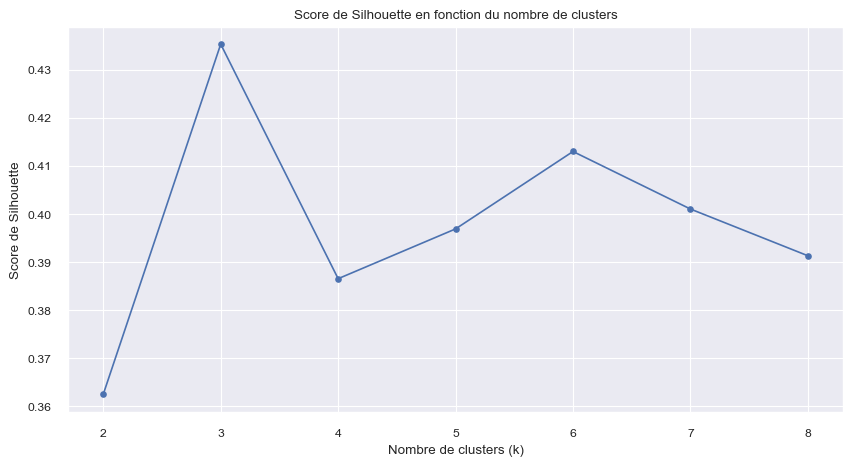

In [254]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

# Liste pour stocker les scores de silhouette
silhouette_scores = []

# Range de k (nombre de clusters) que vous souhaitez tester
k_range = range(2, 9)

# Calculez le score de silhouette pour chaque valeur de k
for k in k_range:
    model = KMeans(n_clusters=k, random_state=42)
    labels = model.fit_predict(x_scaled)
    silhouette_avg = silhouette_score(x_scaled, labels)
    silhouette_scores.append(silhouette_avg)

# Affichez les scores de silhouette pour chaque k
for k, score in zip(k_range, silhouette_scores):
    print(f"Pour k={k}, le score de silhouette est : {score:.3f}")

# Créez un graphique pour visualiser les scores de silhouette
plt.figure(figsize=(10, 5))
plt.plot(k_range, silhouette_scores, marker='o', linestyle='-')
plt.xlabel('Nombre de clusters (k)')
plt.ylabel('Score de Silhouette')
plt.title('Score de Silhouette en fonction du nombre de clusters')
plt.grid(True)
plt.show()

les scores de silhouette les plus élevés sont observés pour k=3 et k=4, ce qui suggère que ces valeurs de k peuvent être de bons choix pour le nombre de clusters.

In [236]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

# Définir le nombre de répétitions
n_repeats = 10  # Vous pouvez ajuster ce nombre en fonction de vos besoins

# Créer une liste pour stocker les scores de silhouette moyens
silhouette_scores = []

# Répéter le processus de clustering plusieurs fois
for _ in range(n_repeats):
    # Sélectionner un échantillon aléatoire de données
    sample_indices = np.random.choice(len(x_scaled), size=len(x_scaled), replace=True)
    sampled_data = x_scaled[sample_indices]

    # Appliquer K-Means
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(sampled_data)
    
    # Calculer le score de silhouette moyen
    silhouette_avg = silhouette_score(sampled_data, labels)
    silhouette_scores.append(silhouette_avg)

# Calculer la moyenne et l'écart-type des scores de silhouette
mean_silhouette = np.mean(silhouette_scores)
std_silhouette = np.std(silhouette_scores)

print(f"Stabilité du Silhouette Score - Moyenne : {mean_silhouette:.3f}")
print(f"Stabilité du Silhouette Score - Écart-type : {std_silhouette:.3f}")


Stabilité du Silhouette Score - Moyenne : 0.328
Stabilité du Silhouette Score - Écart-type : 0.001


1. **Moyenne du Silhouette Score** : Une moyenne du Silhouette Score de 0.328 est généralement considérée comme relativement élevée. Cela indique que, en moyenne, les points d'un cluster sont plus proches les uns des autres que des points d'autres clusters, ce qui est un indicateur positif de la qualité du clustering.

2. **Écart-type du Silhouette Score** : L'écart-type de 0.001 est très faible. Cela signifie que les scores de silhouette obtenus lors de différentes répétitions sont très cohérents, avec peu de variation entre elles. Une faible variation suggère une grande stabilité dans les résultats du clustering.

En combinant ces conclusions, on peut dire que le clustering réalisé avec K-Means semble être stable et cohérent pour vos données. Cela signifie que les clusters obtenus sont robustes et ne dépendent pas fortement de la sélection aléatoire d'échantillons. Les données présentent une structure naturelle qui peut être regroupée de manière cohérente en clusters distincts, avec des points similaires regroupés ensemble et des points de clusters différents étant séparés de manière significative.

Cependant, il est également important de noter que le choix du nombre de clusters (dans ce cas, `k`) peut avoir un impact significatif sur les résultats du clustering. Il peut être judicieux d'explorer différentes valeurs de `k` pour déterminer celle qui maximise la stabilité et l'interprétabilité des clusters dans le contexte de votre application spécifique. Vous pouvez utiliser des méthodes telles que la méthode du coude (Elbow Method) ou le Silhouette Score lui-même pour choisir la meilleure valeur de `k`.

Scores de silhouette pour chaque k : [0.35938278406153357, 0.43529175029777456, 0.4059319200606601, 0.39404674546826896, 0.4196059373050508, 0.40666697814475794, 0.3991538474563392, 0.3960611088117041, 0.40007487131054836, 0.39698907540206213, 0.40207985240806127, 0.4045953335750877, 0.40904433688077696, 0.4078680615748052, 0.41574741094356443]


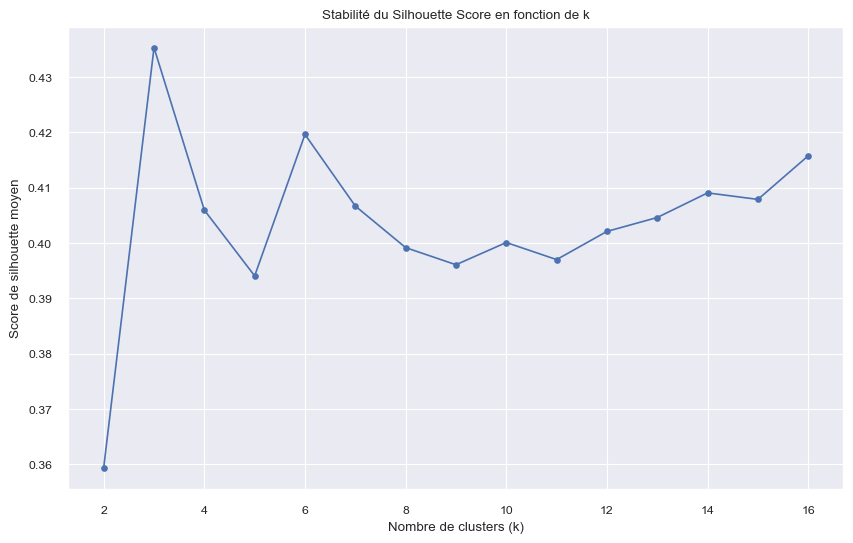

In [238]:
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

# Données (remplacez x_scaled par vos données)
x_scaled = np.random.rand(100, 2)

# Créez une liste pour stocker les scores de silhouette moyens
silhouette_scores = []

# Nombre de répétitions pour évaluer la stabilité
n_repeats = 10

# Range de k (nombre de clusters) que vous souhaitez tester
k_range = range(2, 17)

# Liste pour stocker les scores moyens de silhouette pour chaque k
avg_silhouette_scores = []

# Essayer différentes valeurs de k (nombre de clusters)
for k in k_range:
    avg_silhouette = 0
    
    # Répétez le clustering plusieurs fois pour évaluer la stabilité
    for _ in range(n_repeats):
        model = KMeans(n_clusters=k, random_state=np.random.randint(1000))
        labels = model.fit_predict(x_scaled)
        silhouette_avg = silhouette_score(x_scaled, labels)
        avg_silhouette += silhouette_avg
    
    # Calculez la moyenne des scores de silhouette sur les répétitions
    avg_silhouette /= n_repeats
    
    # Ajoutez le score moyen à la liste
    silhouette_scores.append(avg_silhouette)
    avg_silhouette_scores.append(avg_silhouette)

# Affichez les scores de silhouette pour chaque k
print("Scores de silhouette pour chaque k :", silhouette_scores)

# Affichage du graphique
plt.figure(figsize=(10, 6))
plt.plot(k_range, avg_silhouette_scores, marker='o', linestyle='-')
plt.title('Stabilité du Silhouette Score en fonction de k')
plt.xlabel('Nombre de clusters (k)')
plt.ylabel('Score de silhouette moyen')
plt.grid(True)
plt.show()


In [249]:
# from sklearn.cluster import KMeans
# from sklearn.datasets import make_blobs
# from sklearn.metrics import pairwise_distances_argmin_min
# from sklearn.datasets import make_blobs
# from sklearn.cluster import KMeans
# import matplotlib.pyplot as plt

# # Générer des données de test
# X, y = make_blobs(n_samples=300, centers=4, cluster_std=1.0, random_state=42)
# k_max = 5  # Nombre maximum de clusters à tester
# # Fonction pour calculer le Gap Statistic
# def compute_gap(data, k_max):
#     gaps = []
#     for k in range(1, k_max + 1):
#         model = KMeans(n_clusters=k)
#         model.fit(data)
#         intra_cluster_dist = model.inertia_
#         reference_data = np.random.rand(*data.shape)
#         reference_model = KMeans(n_clusters=k)
#         reference_model.fit(reference_data)
#         reference_intra_cluster_dist = reference_model.inertia_
#         gap = np.log(reference_intra_cluster_dist) - np.log(intra_cluster_dist)
#         gaps.append(gap)
#     return gaps

# k_max = 16  # Nombre maximum de clusters à tester
# gap_scores = compute_gap(X, k_max)

# # Afficher les scores Gap
# plt.plot(range(1, k_max + 1), gap_scores)
# plt.xlabel('Nombre de clusters')
# plt.ylabel('Gap Score')
# plt.title('Méthode du Gap Statistic')
# plt.show()


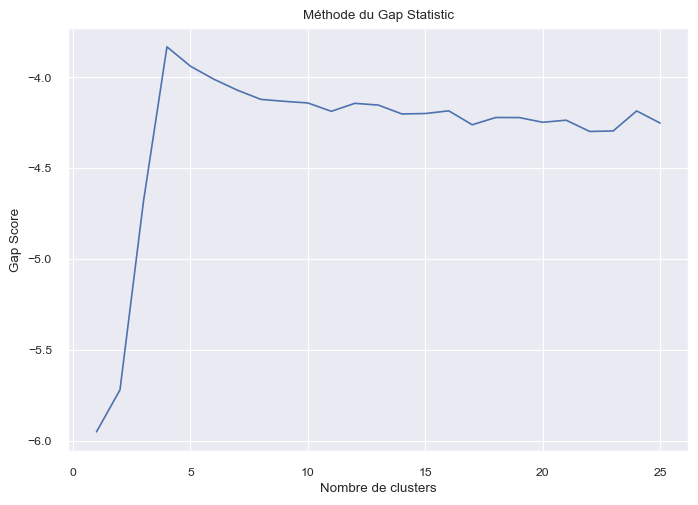

In [248]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Générer des données de test
X, y = make_blobs(n_samples=300, centers=4, cluster_std=1.0, random_state=42)
# Fonction pour calculer le Gap Statistic
def compute_gap(data, k_max):
    gaps = []
    for k in range(1, k_max + 1):
        model = KMeans(n_clusters=k)
        model.fit(data)
        intra_cluster_dist = model.inertia_
        reference_data = np.random.rand(*data.shape)
        reference_model = KMeans(n_clusters=k)
        reference_model.fit(reference_data)
        reference_intra_cluster_dist = reference_model.inertia_
        gap = np.log(reference_intra_cluster_dist) - np.log(intra_cluster_dist)
        gaps.append(gap)
    return gaps

k_max = 25  # Nombre maximum de clusters à tester
gap_scores = compute_gap(X, k_max)

# Afficher les scores Gap
plt.plot(range(1, k_max + 1), gap_scores)
plt.xlabel('Nombre de clusters')
plt.ylabel('Gap Score')
plt.title('Méthode du Gap Statistic')
plt.show()


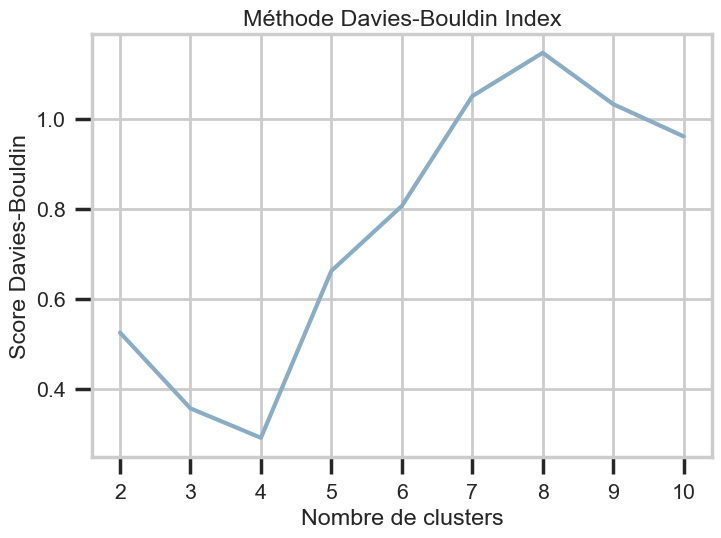

In [94]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import davies_bouldin_score

# Générer des données de test
X, y = make_blobs(n_samples=300, centers=4, cluster_std=1.0, random_state=42)

# Calculer le score Davies-Bouldin pour différentes valeurs de k
k_max = 10  # Nombre maximum de clusters à tester
davies_bouldin_scores = []
for k in range(2, k_max + 1):
    model = KMeans(n_clusters=k)
    labels = model.fit_predict(X)
    score = davies_bouldin_score(X, labels)
    davies_bouldin_scores.append(score)

# Afficher les scores Davies-Bouldin
plt.plot(range(2, k_max + 1), davies_bouldin_scores)
plt.xlabel('Nombre de clusters')
plt.ylabel('Score Davies-Bouldin')
plt.title('Méthode Davies-Bouldin Index')
plt.show()


### Applying K-Means

[1 1 1 ... 0 1 0]
 Our cluster centers are as follows
[[ 0.77780554 -0.34807737 -0.3230299  -0.87390971]
 [ 0.0270544   2.54606284  0.23551648  0.96072084]
 [-0.69306767 -0.35362574  0.22381131  0.52153115]]


recency  frequency  monetary_value  score
cluster_pred                                           
0               38789      38789           38789  38789
1               11430      11430           11430  11430
2               44140      44140           44140  44140

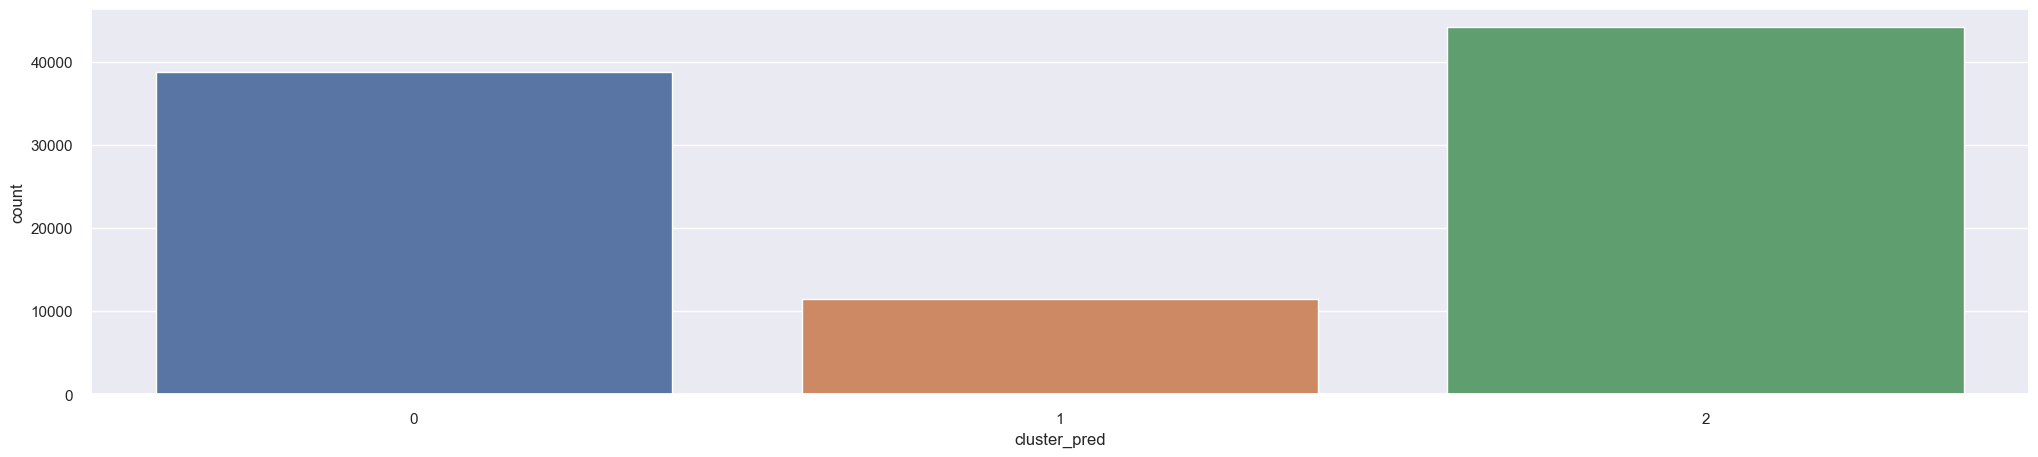

In [96]:
kmeans_scaled = KMeans(3)
kmeans_scaled.fit(x_scaled)
identified_clusters = kmeans_scaled.fit_predict(rfm1)
clusters_scaled = rfm1.copy()
clusters_scaled['cluster_pred']=kmeans_scaled.fit_predict(x_scaled)
print(identified_clusters)
sns.set(style="darkgrid")
print(" Our cluster centers are as follows")
print(kmeans_scaled.cluster_centers_)
f, ax = plt.subplots(figsize=(25, 5))
ax = sns.countplot(x="cluster_pred", data=clusters_scaled)
clusters_scaled.groupby(['cluster_pred']).count()

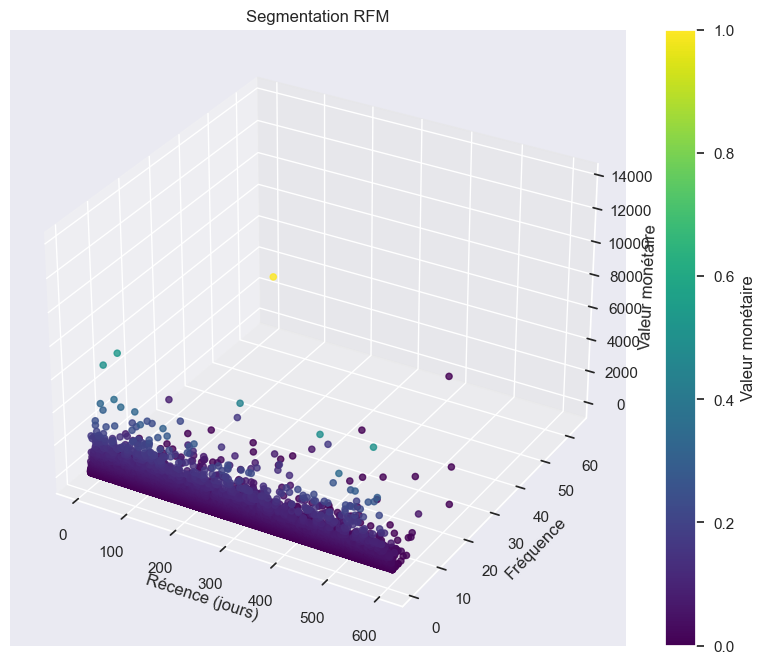

In [101]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Création d'un graphique en 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Ajout des points sur le graphique en 3D
# ax.scatter(rfm_df['recency'], rfm_df['frequency'], rfm_df['monetary_value'], c=rfm_df['monetary_value'], cmap='viridis', alpha=0.8)
ax.scatter(rfm_df['recency'], rfm_df['frequency'], rfm_df['monetary_value'], c=rfm_df['monetary_value'], cmap='viridis', alpha=0.8)

# Configuration des axes
ax.set_xlabel('Récence (jours)')
ax.set_ylabel('Fréquence')
ax.set_zlabel('Valeur monétaire')
ax.set_title('Segmentation RFM')

# Ajout de la barre de couleur pour représenter la valeur monétaire
cbar = plt.colorbar(ax.scatter([], [], [], c=[], cmap='viridis'), ax=ax)
cbar.set_label('Valeur monétaire')

plt.show()


Silhouette Score: 0.358


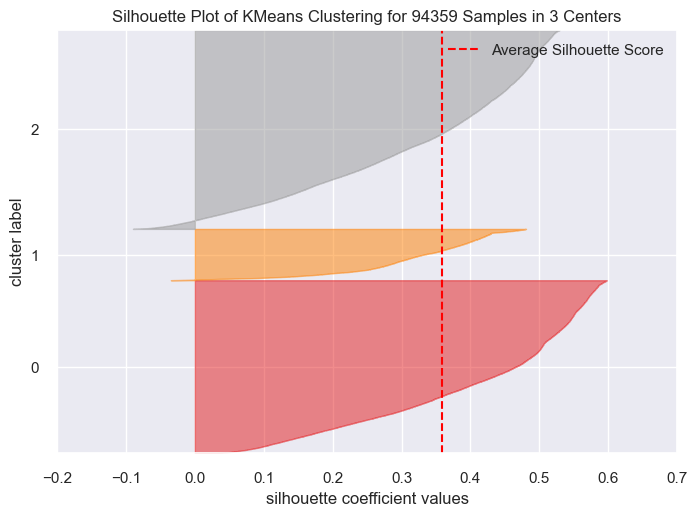

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 94359 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [103]:
from sklearn.metrics import silhouette_samples, silhouette_score
sil_score = silhouette_score(x_scaled, kmeans_scaled.labels_, metric='euclidean')
print('Silhouette Score: %.3f' % sil_score)

from yellowbrick.cluster import SilhouetteVisualizer
model = KMeans(3)
visualizer = SilhouetteVisualizer(model)
visualizer.fit(x_scaled)   
visualizer.poof()   
   

### Cluster Profiling

We are going to analyse and understand our clusters.

In [369]:
rfm1['cluster']= clusters_scaled['cluster_pred']
rfm1['level']=rfm['level']

rfm1.groupby('cluster').agg({
    'recency' : ['mean','min','max'],
    'frequency' : ['mean','min','max'],
    'monetary_value' : ['mean','min','max','count']
})

C:\Users\Zbook\AppData\Local\Temp\ipykernel_5040\3415303891.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm1['cluster']= clusters_scaled['cluster_pred']
C:\Users\Zbook\AppData\Local\Temp\ipykernel_5040\3415303891.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm1['level']=rfm['level']


recency               frequency           monetary_value          \
               mean    min    max      mean  min  max           mean     min   
cluster                                                                        
0        174.509514    2.0  364.0       1.0  1.0  1.0     750.702755  418.48   
1        260.143119  175.0  364.0       1.0  1.0  1.0     127.488866   10.07   
2         89.349370    2.0  175.0       1.0  1.0  1.0     128.161413    9.59   

                         
             max  count  
cluster                  
0        1512.16   4940  
1         511.20  33287  
2         500.84  33237

En analysant le tableau des statistiques pour chaque cluster, voici ce que l'on peut en déduire :

**Cluster 0 :**
- **Recency (Récence)** : En moyenne, les clients de ce cluster ont effectué leur dernier achat il y a environ 175 jours, avec un minimum de 2 jours et un maximum de 364 jours. Cela suggère que ces clients sont plutôt récents.
- **Frequency (Fréquence)** : Tous les clients de ce cluster ont effectué un seul achat, ce qui signifie qu'ils sont peu fréquents.
- **Monetary Value (Valeur Monétaire)** : La valeur moyenne de leurs achats est assez élevée, autour de 750.70 unités monétaires, avec une variation de 418.48 à 1512.16. Cela suggère que bien que ces clients n'achètent pas souvent, ils dépensent beaucoup lorsqu'ils le font. Le cluster a un total de 4940 membres.

**Cluster 1 :**
- **Recency (Récence)** : Les clients de ce cluster ont effectué leur dernier achat en moyenne il y a environ 260 jours, avec une période minimale de 175 jours et une période maximale de 364 jours. Cela suggère que ces clients sont plutôt anciens.
- **Frequency (Fréquence)** : Tout comme le Cluster 0, tous les clients de ce cluster ont effectué un seul achat, ce qui signifie qu'ils sont peu fréquents.
- **Monetary Value (Valeur Monétaire)** : La valeur moyenne de leurs achats est relativement faible, environ 127.49 unités monétaires, avec une variation de 10.07 à 511.20. Cela suggère que ces clients dépensent moins lors de leurs achats. Le cluster compte un total de 33 287 membres.

**Cluster 2 :**
- **Recency (Récence)** : Les clients de ce cluster ont effectué leur dernier achat en moyenne il y a environ 89 jours, avec une période minimale de 2 jours et une période maximale de 175 jours. Cela suggère que ces clients sont plus récents que ceux du Cluster 1, mais plus anciens que ceux du Cluster 0.
- **Frequency (Fréquence)** : Tout comme les deux autres clusters, tous les clients de ce cluster ont effectué un seul achat, ce qui signifie qu'ils sont peu fréquents.
- **Monetary Value (Valeur Monétaire)** : La valeur moyenne de leurs achats est similaire à celle du Cluster 1, environ 128.16 unités monétaires, avec une variation de 9.59 à 500.84. Cela suggère des dépenses assez faibles. Le cluster compte un total de 33 237 membres.

**Interprétation :**

- Le Cluster 0 représente les clients récents et à forte dépense, bien qu'ils achètent rarement. Ces clients pourraient être des nouveaux clients qui ont effectué des achats importants lors de leur première interaction.

- Le Cluster 1 représente les clients anciens mais à faible dépense. Ils n'ont pas acheté fréquemment et ont généralement dépensé moins lors de leurs achats.

- Le Cluster 2 représente les clients relativement récents avec des dépenses similaires à celles du Cluster 1. Ces clients sont peut-être en train de découvrir votre entreprise et n'ont pas encore dépensé beaucoup.

En utilisant ces informations, vous pourriez personnaliser vos stratégies marketing. Par exemple, pour le Cluster 0, vous pourriez les fidéliser davantage en offrant des promotions spéciales pour les inciter à acheter plus fréquemment. Pour le Cluster 1, vous pourriez envisager des campagnes visant à augmenter leur valeur moyenne d'achat. Pour le Cluster 2, vous pourriez les encourager à acheter plus fréquemment, tout en maintenant leurs dépenses stables.

En se basant sur les informations fournies, voici comment on pourrait associer ces clusters à des groupes de clients :

**Cluster 0 : Clients "Bons"**
- Les clients de ce cluster ont une récence relativement faible, ce qui signifie qu'ils ont acheté récemment.
- Bien qu'ils n'achètent pas fréquemment, ils ont une valeur monétaire élevée à chaque achat, ce qui suggère qu'ils sont prêts à dépenser beaucoup d'argent.
- En raison de leur récence et de leur valeur monétaire élevée, on peut les considérer comme de "Bons" clients, c'est-à-dire qu'ils sont précieux pour l'entreprise.

**Cluster 1 : Clients "Mauvais"**
- Les clients de ce cluster ont une récence élevée, ce qui signifie qu'ils n'ont pas acheté depuis longtemps.
- Ils n'achètent pas fréquemment, et leur valeur monétaire moyenne d'achat est relativement faible.
- En raison de leur récence élevée et de leur faible valeur monétaire, on peut les considérer comme de "Mauvais" clients, car ils n'ont pas montré beaucoup d'intérêt pour les achats récents ni une forte propension à dépenser.

**Cluster 2 : Clients "Moyens"**
- Les clients de ce cluster ont une récence modérée, ce qui signifie qu'ils ont acheté récemment, mais pas aussi récemment que ceux du Cluster 0.
- Comme les deux autres clusters, ils n'achètent pas fréquemment, et leur valeur monétaire moyenne d'achat est similaire à celle du Cluster 1.
- On peut les considérer comme des clients "Moyens", car leur comportement d'achat est intermédiaire entre les "Bons" et les "Mauvais".

Cependant, il est important de noter que ces catégories ("Bons", "Moyens", "Mauvais") sont simplistes et dépendent de la définition spécifique des seuils de récence, de fréquence et de valeur monétaire. Les entreprises peuvent ajuster ces seuils en fonction de leurs besoins et de leurs objectifs marketing.

# Analyse PCA CAH

In [104]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline, make_pipeline
from yellowbrick.cluster import KElbowVisualizer #, SilhouetteVisualizer, InterclusterDistance
from sklearn.preprocessing import normalize
import scipy.cluster.hierarchy as shc

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score

In [105]:
# Utilisation de .astype(int) pour convertir la colonne en entiers
# df['customer_unique_id'] = df['customer_unique_id'].astype('int64')

In [106]:
# df=pd.read_excel("../input/online-retail-ii-data-set-from-ml-repository/online_retail_II.xlsx")
df = pd.read_csv('data/data_cleaned_rfm.csv')

In [107]:
df['last_order'] = df['last_order'].astype(
    'datetime64')

In [108]:
rfm['level'] = rfm['score'].apply(lambda score : rfm_level(score))
rfm.head()

customer_unique_id  period  last_order  frequency  \
0  baafa8da2de0fd753a885a5c15b11427  201806     81180.0          1   
1  d1588e9ace87e26a010ceb25775113e8  201802     54282.0          1   
2  d34394c17a8b789449feefeb97ac0620  201807     90255.0          1   
3  9136946b6b16453f79f2dfcef449486e  201706     13935.0          1   
4  3105d598604298481a38511105000bdd  201702      2425.0          1   

   monetary_value  total_dep_by_customer  nb_products_buy  volume_product_cm3  \
0          100.35                 100.35                1              7260.0   
1           73.34                  73.34                1             46656.0   
2           47.54                  47.54                1             39600.0   
3           53.33                  53.33                1              3840.0   
4           52.68                  52.68                1              2816.0   

   fav_categ  eval_mean_per_customer  nb_of_comment  fav_payment_type  \
0       12.0                     5.0            0.0               2.0   
1       13.0                     4.0            0.0               1.0   
2       55.0                     5.0            0.0               0.0   
3       45.0                     1.0            1.0               1.0   
4       73.0                     1.0            1.0               0.0   

   satisfaction_client  recency  Cluster recency_score frequency_score  \
0                  1.0       76        1             5               1   
1                  1.0      196        1             3               1   
2                  1.0       31        1             5               1   
3                  0.0      429        2             1               1   
4                  0.0      549        2             1               1   

  monetary_score  score    level  
0              3      9      Bon  
1              2      6    Moyen  
2              1      7    Moyen  
3              2      4    Moyen  
4              1      3  Mauvais

In [109]:
df.set_index('customer_unique_id', inplace=True)

In [110]:
df.dtypes

last_order                              datetime64[ns]
frequency                                      float64
monetary_value                                 float64
review_score                                   float64
satisfaction_status                             object
most_purchased_category                         object
avg_price_in_most_purchased_category           float64
max_comment_length                             float64
delivery_duration                              float64
num_unique_products                            float64
customer_state                                  object
recency                                        float64
mean_monetary_value                            float64
dtype: object

In [111]:
categorical_features = list(df.select_dtypes(exclude=['int32','int64', 'float64', 'uint8']).columns)
categorical_features

['last_order',
 'satisfaction_status',
 'most_purchased_category',
 'customer_state']

In [112]:
data_bis = df.drop(categorical_features ,axis = 1)
data_bis

frequency  monetary_value  review_score  \
customer_unique_id                                                          
0c595173cd5ead1e6c3242781d521c11        1.0           27.23           4.0   
2ee27a6992275f12e9b8320102979055        1.0           42.87           4.0   
7878d477fdfe4911ac5543b953fb4162        1.0          602.88           4.0   
c3c223cb6c2815575f6011ba39740afc        1.0          259.68           5.0   
d37d40917018692928253d2f015ad566        1.0           68.12           5.0   
...                                     ...             ...           ...   
30c9215fbaf3f2ab6b6566f5a32ca75a        1.0           59.09           4.0   
32f151f701410f4f875920ff8b235001        1.0          112.36           5.0   
73b8cd05f8b04f402a513776ed53f5e0        1.0           95.43           4.0   
e9fbafc65ee79ac983dbdf0e2057a07b        1.0           37.58           3.0   
611ec4b5acd5f2b7ada09c9e188b695f        1.0           47.68           5.0   

                                  avg_price_in_most_purchased_category  \
customer_unique_id                                                       
0c595173cd5ead1e6c3242781d521c11                                 17.89   
2ee27a6992275f12e9b8320102979055                                 30.00   
7878d477fdfe4911ac5543b953fb4162                                129.00   
c3c223cb6c2815575f6011ba39740afc                                189.99   
d37d40917018692928253d2f015ad566                                 53.99   
...                                                                ...   
30c9215fbaf3f2ab6b6566f5a32ca75a                                 44.99   
32f151f701410f4f875920ff8b235001                                 79.90   
73b8cd05f8b04f402a513776ed53f5e0                                 79.99   
e9fbafc65ee79ac983dbdf0e2057a07b                                 22.32   
611ec4b5acd5f2b7ada09c9e188b695f                                 39.90   

                                  max_comment_length  delivery_duration  \
customer_unique_id                                                        
0c595173cd5ead1e6c3242781d521c11                 0.0           449137.0   
2ee27a6992275f12e9b8320102979055                 0.0           708330.0   
7878d477fdfe4911ac5543b953fb4162                57.0           504971.0   
c3c223cb6c2815575f6011ba39740afc                15.0          2077291.0   
d37d40917018692928253d2f015ad566                50.0          1143609.0   
...                                              ...                ...   
30c9215fbaf3f2ab6b6566f5a32ca75a               179.0          2084567.0   
32f151f701410f4f875920ff8b235001                 0.0          1374720.0   
73b8cd05f8b04f402a513776ed53f5e0                 0.0           622630.0   
e9fbafc65ee79ac983dbdf0e2057a07b                 0.0          1380079.0   
611ec4b5acd5f2b7ada09c9e188b695f                 0.0           538718.0   

                                  num_unique_products  recency  \
customer_unique_id                                               
0c595173cd5ead1e6c3242781d521c11                  1.0    219.0   
2ee27a6992275f12e9b8320102979055                  1.0     30.0   
7878d477fdfe4911ac5543b953fb4162                  1.0     73.0   
c3c223cb6c2815575f6011ba39740afc                  1.0    322.0   
d37d40917018692928253d2f015ad566                  1.0    293.0   
...                                               ...      ...   
30c9215fbaf3f2ab6b6566f5a32ca75a                  1.0    195.0   
32f151f701410f4f875920ff8b235001                  1.0    135.0   
73b8cd05f8b04f402a513776ed53f5e0                  1.0    134.0   
e9fbafc65ee79ac983dbdf0e2057a07b                  1.0     31.0   
611ec4b5acd5f2b7ada09c9e188b695f                  1.0    240.0   

                                  mean_monetary_value  
customer_unique_id                                     
0c595173cd5ead1e6c3242781d521c11                27.23  
2ee27a6992275f12e9b8320102979055                42.87  
7878d477fd

In [113]:
scaler = MinMaxScaler()

preprocessor = ColumnTransformer([
    ('scaler', scaler, data_bis)])

In [114]:
X_cah = data_bis.copy()
X_cah.head(10)

frequency  monetary_value  review_score  \
customer_unique_id                                                          
0c595173cd5ead1e6c3242781d521c11        1.0           27.23           4.0   
2ee27a6992275f12e9b8320102979055        1.0           42.87           4.0   
7878d477fdfe4911ac5543b953fb4162        1.0          602.88           4.0   
c3c223cb6c2815575f6011ba39740afc        1.0          259.68           5.0   
d37d40917018692928253d2f015ad566        1.0           68.12           5.0   
c119ea09235d299ed246d52960913d6f        1.0          317.39           5.0   
059ba8400bf965adf606ecc7ef3396e9        1.0          205.26           5.0   
44bd7571a7dad968306f7776bd5a5745        1.0          142.02           4.0   
bb21eb7a7de7d4886dfa152f60505863        1.0           76.51           5.0   
a2c4f621974a8eb173a33890280eb327        1.0           72.45           4.0   

                                  avg_price_in_most_purchased_category  \
customer_unique_id                                                       
0c595173cd5ead1e6c3242781d521c11                                 17.89   
2ee27a6992275f12e9b8320102979055                                 30.00   
7878d477fdfe4911ac5543b953fb4162                                129.00   
c3c223cb6c2815575f6011ba39740afc                                189.99   
d37d40917018692928253d2f015ad566                                 53.99   
c119ea09235d299ed246d52960913d6f                                299.99   
059ba8400bf965adf606ecc7ef3396e9                                185.00   
44bd7571a7dad968306f7776bd5a5745                                124.90   
bb21eb7a7de7d4886dfa152f60505863                                 59.90   
a2c4f621974a8eb173a33890280eb327                                 59.90   

                                  max_comment_length  delivery_duration  \
customer_unique_id                                                        
0c595173cd5ead1e6c3242781d521c11                 0.0           449137.0   
2ee27a6992275f12e9b8320102979055                 0.0           708330.0   
7878d477fdfe4911ac5543b953fb4162                57.0           504971.0   
c3c223cb6c2815575f6011ba39740afc                15.0          2077291.0   
d37d40917018692928253d2f015ad566                50.0          1143609.0   
c119ea09235d299ed246d52960913d6f               197.0           351638.0   
059ba8400bf965adf606ecc7ef3396e9                 0.0          1248652.0   
44bd7571a7dad968306f7776bd5a5745                 0.0           614645.0   
bb21eb7a7de7d4886dfa152f60505863                 0.0           533726.0   
a2c4f621974a8eb173a33890280eb327                84.0           977365.0   

                                  num_unique_products  recency  \
customer_unique_id                                               
0c595173cd5ead1e6c3242781d521c11                  1.0    219.0   
2ee27a6992275f12e9b8320102979055                  1.0     30.0   
7878d477fdfe4911ac5543b953fb4162                  1.0     73.0   
c3c223cb6c2815575f6011ba39740afc                  1.0    322.0   
d37d40917018692928253d2f015ad566                  1.0    293.0   
c119ea09235d299ed246d52960913d6f                  1.0     24.0   
059ba8400bf965adf606ecc7ef3396e9                  1.0    158.0   
44bd7571a7dad968306f7776bd5a5745                  1.0    193.0   
bb21eb7a7de7d4886dfa152f60505863                  1.0     65.0   
a2c4f621974a8eb173a33890280eb327                  1.0    308.0   

                                  mean_monetary_value  
customer_unique_id                                     
0c595173cd5ead1e6c3242781d521c11                27.23  
2ee27a6992275f12e9b8320102979055                42.87  
7878d477fdfe4911ac5543b953fb4162               602.88  
c3c223cb6c2815575f6011ba39740afc               259.68  
d37d40917018692928253d2f015ad566                68.12  
c119ea09235d299ed246d52960913d6f               317.39  
059ba8400bf965adf606ecc7ef3396e9               205.26  
44bd7571a7dad968306f77

In [115]:
# Step 3: Preprocessing the data

X_cah = X_cah.dropna()
# Remplacez les valeurs infinies par des valeurs finies (par exemple, remplacez les valeurs infinies par la moyenne des valeurs non infinies) :

X_cah = X_cah.replace([np.inf, -np.inf], np.nan)
X_cah = X_cah.fillna(df.mean())

# Scaling the data to bring all the attributes to a comparable level
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cah)
  
# Normalizing the data so that 
# the data approximately follows a Gaussian distribution
X_normalized = normalize(X_scaled)
  
# Converting the numpy array into a pandas DataFrame
X_normalized = pd.DataFrame(X_normalized)

In [116]:
# Explained variance
pca_cah = PCA()
pca_cah.fit(X_normalized)

print(pca_cah.explained_variance_)
print(pca_cah.explained_variance_ratio_)

[2.83255674e-01 2.30655545e-01 1.39589872e-01 1.34522720e-01
 1.04005442e-01 3.30832007e-02 1.64091355e-02 9.42356813e-03
 3.65882932e-05]
[2.97856058e-01 2.42544661e-01 1.46785017e-01 1.41456679e-01
 1.09366392e-01 3.47884708e-02 1.72549427e-02 9.90930496e-03
 3.84742329e-05]


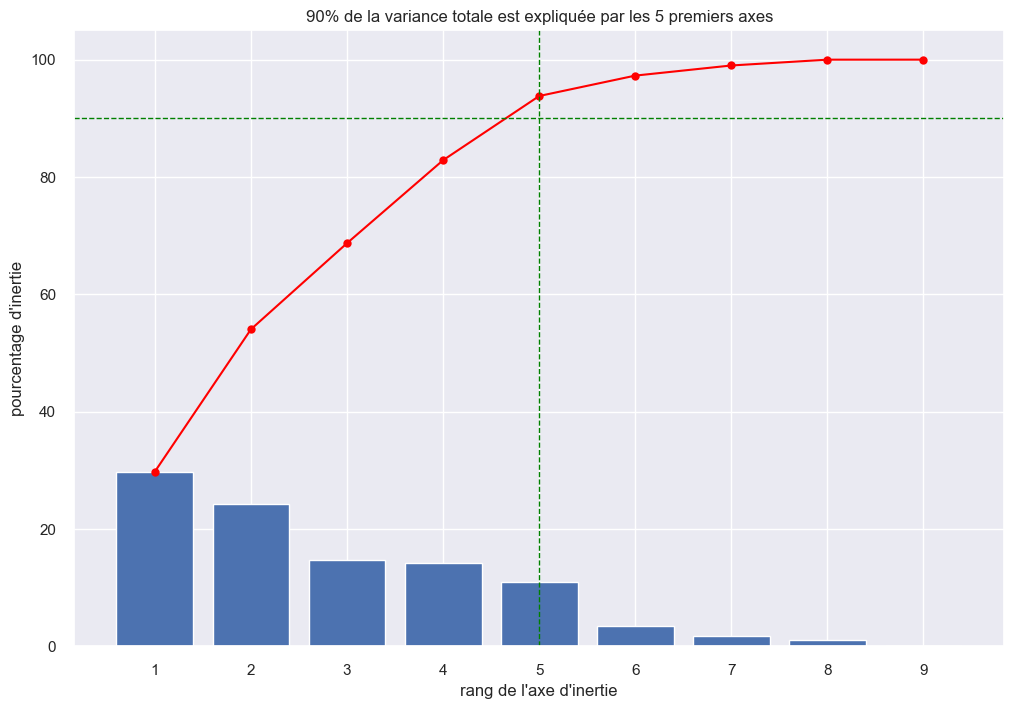

In [117]:
# Explained variance
pca_cah = PCA()
pca_cah.fit(X_normalized)
varexpl = pca_cah.explained_variance_ratio_*100

# Plot of cumulated variance
plt.figure(figsize=(12,8))
plt.bar(np.arange(len(varexpl))+1, varexpl)

cumSumVar = varexpl.cumsum() 
plt.plot(np.arange(len(varexpl))+1, cumSumVar,c="red",marker='o')
plt.axhline(y=90, linestyle="--", 
            color="green",
            linewidth=1)

limit = 90
valid_idx = np.where(cumSumVar >= limit)[0]
min_plans = valid_idx[cumSumVar[valid_idx].argmin()]+1
plt.axvline(x=min_plans, linestyle="--", 
            color="green",
            linewidth=1)

plt.xlabel("rang de l'axe d'inertie")
plt.xticks(np.arange(len(varexpl))+1)
plt.ylabel("pourcentage d'inertie")
plt.title("{}% de la variance totale est expliquée"\
          " par les {} premiers axes".format(limit,
                                            min_plans))
plt.show(block=False)

In [118]:
# 4 : Réduire la dimensionnalité des Données

pca_cah2 = PCA(n_components = 2)
X_principal = pca_cah2.fit_transform(X_normalized)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2']

In [119]:
from sklearn.model_selection import train_test_split

In [120]:
 X_train, X_test,  = train_test_split(
                     X_principal,  test_size=0.8, random_state=0)

In [393]:
 y_train, y_test,  = train_test_split(
                     X_principal,  test_size=0.2, random_state=0)

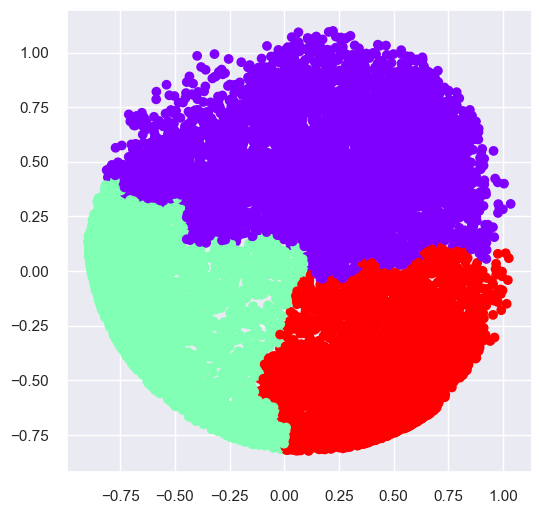

In [395]:

# k = 3

ac3 = AgglomerativeClustering(n_clusters = 3)
  
# Visualizing the clustering
plt.figure(figsize =(6, 6))
plt.scatter(y_test['P1'], y_test['P2'],
            c = ac3.fit_predict(y_test), cmap ='rainbow')
plt.show()

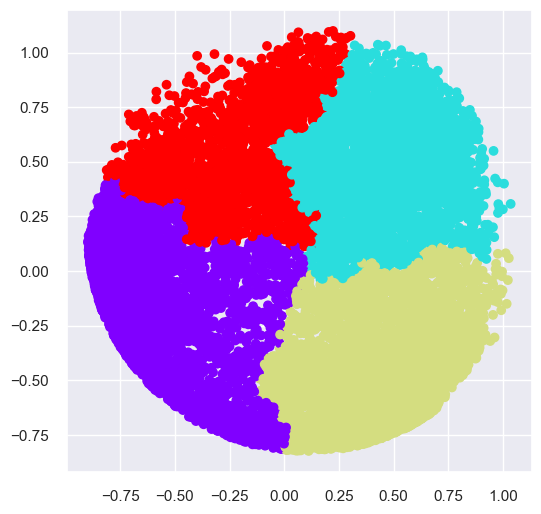

In [396]:

# k = 4

ac4 = AgglomerativeClustering(n_clusters = 4)
  
# Visualizing the clustering
plt.figure(figsize =(6, 6))
plt.scatter(y_test['P1'], y_test['P2'],
            c = ac4.fit_predict(y_test), cmap ='rainbow')
plt.show()

### silhouette scores

In [397]:
# Appending the silhouette scores of the different models to the list
silhouette_scores = []
silhouette_scores.append(
        silhouette_score(y_test, ac2.fit_predict(y_test)))
silhouette_scores.append(
        silhouette_score(y_test, ac3.fit_predict(y_test)))
silhouette_scores.append(
        silhouette_score(y_test, ac4.fit_predict(y_test)))

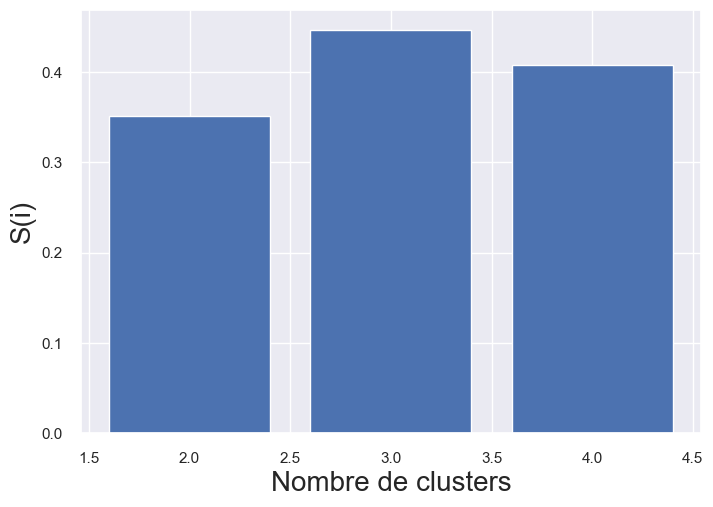

In [398]:
# # Plotting a bar graph to compare the results
# k = [2, 3, 4, 5, 6, 7]
# plt.bar(k, silhouette_scores)
# plt.xlabel('Number of clusters', fontsize = 20)
# plt.ylabel('S(i)', fontsize = 20)
# plt.show()
# Importer les bibliothèques nécessaires
import matplotlib.pyplot as plt

# Liste des nombres de clusters à tester
k = [2, 3, 4]

# Tracer un graphique en barres pour comparer les résultats
plt.bar(k, silhouette_scores)

# Ajouter une étiquette pour l'axe des abscisses (nombre de clusters)
plt.xlabel('Nombre de clusters', fontsize=20)

# Ajouter une étiquette pour l'axe des ordonnées (valeur de S(i) - silhouette_score)
plt.ylabel('S(i)', fontsize=20)

# Afficher le graphique
plt.show()


### dendrogramme

In [399]:
Xbis_train,Xbis_test   = train_test_split(
                     X_normalized,  test_size=0.8, random_state=0)

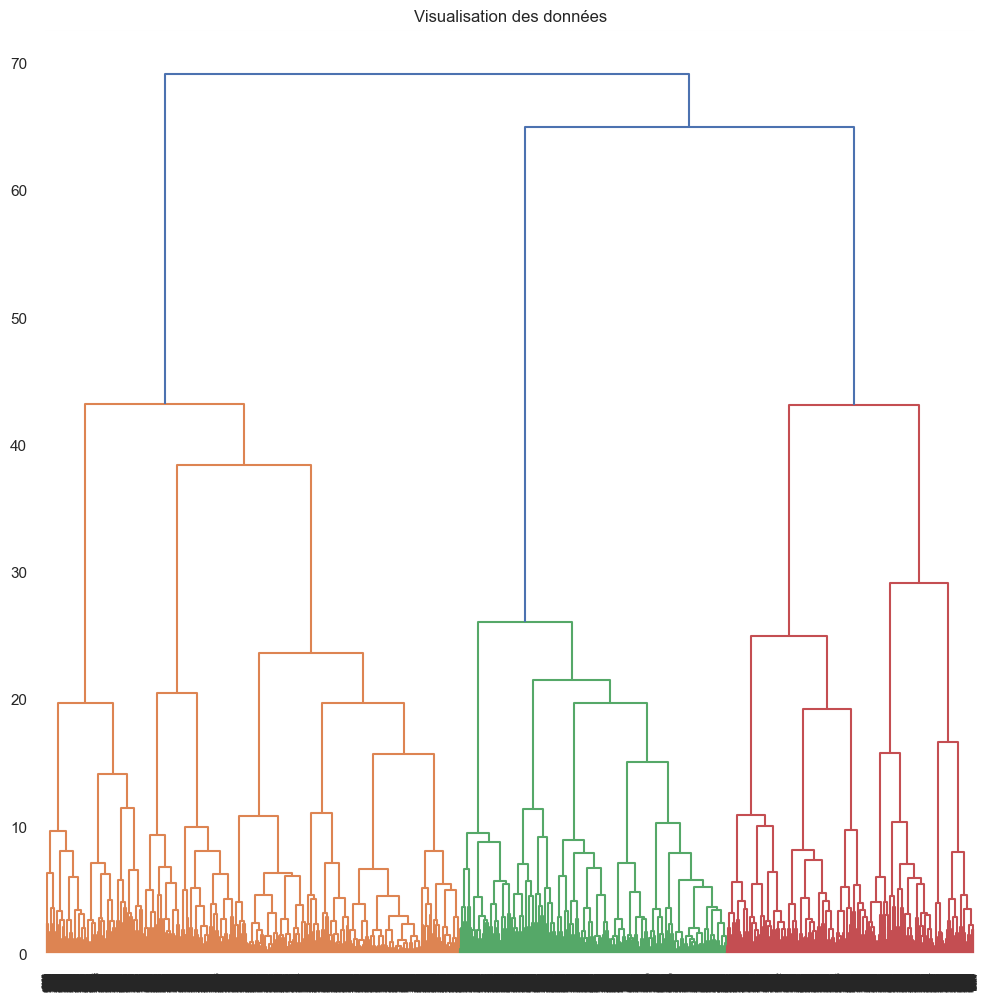

In [400]:
# Créer une figure pour le dendrogramme avec une taille de 12x12 pouces
plt.figure(figsize=(12, 12))

# Donner un titre à la figure
plt.title('Visualisation des données')

# Calculer le dendrogramme à l'aide de la méthode Ward pour la liaison (agglomération) des données
# et le stocker dans la variable 'Dendrogram'
Dendrogram = shc.dendrogram((shc.linkage(Xbis_train, method='ward')))

In [401]:
rfm_df

customer_unique_id  period  last_order  frequency  \
0      0209af58dcd97d6ff5bac3f5fdfb8c0e  201808     90829.0          1   
1      91fd93ada8ac3dabcc95769d269a5900  201706     11178.0          2   
2      30fac3a7d72060742bcbe7b787617343  201802     53136.0          1   
3      07c9259c1afcbd1f6b416d9985782083  201702      1292.0          1   
4      14b24293371e96bdb40f996ad4067cce  201701       442.0          1   
...                                 ...     ...         ...        ...   
96990  9a8ad62bc98119f5b94c149c1eb4c971  201711     37924.0          1   
96991  1d191e1fe1fbad1c0ff0a65fcb6802bb  201702      1984.0          1   
96992  8610d0b6aaf37818de21daf5c7773a79  201802     55424.0          1   
96993  7b03054b90e1c46360273803ece62706  201808     91059.0          1   
96994  de5f37a4f069c0fb5cf92fef24442f0c  201804     65677.0          1   

       monetary_value  total_dep_by_customer  nb_products_buy  \
0              119.53                 119.53                1   
1              113.38                 226.76                2   
2              278.33                 278.33                1   
3             1347.96                1347.96                1   
4              114.77                 114.77                1   
...               ...                    ...              ...   
96990          162.99                 162.99                1   
96991           76.05                  76.05                1   
96992           78.20                  78.20                1   
96993          264.08                 264.08                1   
96994          108.21                 108.21                1   

       volume_product_cm3  fav_categ  eval_mean_per_customer  nb_of_comment  \
0                 27000.0       55.0                     4.0            0.0   
1                  6656.0        0.0                     5.0            0.0   
2                 22528.0       30.0                     2.0            1.0   
3                  7935.0       67.0                     5.0            1.0   
4                  6400.0       63.0                     4.0            0.0   
...                   ...        ...                     ...            ...   
96990             48000.0       14.0                     5.0            1.0   
96991              8712.0       12.0                     1.0            1.0   
96992              4096.0       60.0                     2.0            1.0   
96993             42875.0       63.0                     5.0            1.0   
96994              6498.0       64.0                     5.0            1.0   

       fav_payment_type  satisfaction_client  recency  Cluster  
0                   1.0                  1.0       29        0  
1                   1.0                  1.0      455        0  
2                   1.0                  0.0      201        1  
3                   1.0                  1.0      569        0  
4                   0.0                  1.0      582        0  
...                 ...                  ...      ...      ...  
96990               1.0                  1.0      275        0  
96991               1.0                  0.0      558        1  
96992               1.0                  0.0      191        1  
96993               1.0                  1.0       28        0  
96994               1.0                  1.0      147        0  

[96995 rows x 15 columns]

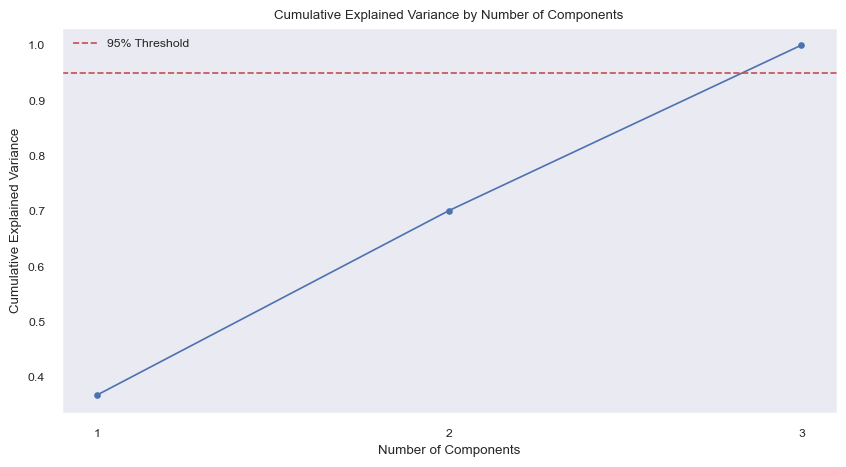

In [216]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Sélectionner les colonnes RFM pour l'ACP
rfm_data = df[['frequency', 'monetary_value', 'recency']]

# Normaliser les données
rfm_scaled = (rfm_data - rfm_data.mean()) / rfm_data.std()

# Appliquer l'ACP
pca = PCA()
pca_result = pca.fit_transform(rfm_scaled)

# Variance expliquée par chaque composante
explained_variance_ratio = pca.explained_variance_ratio_

# Graphique pour choisir le nombre de composantes principales
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(explained_variance_ratio) + 1), np.cumsum(explained_variance_ratio), marker='o')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Threshold')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by Number of Components')
plt.xticks(range(1, len(explained_variance_ratio) + 1))
plt.legend()
plt.grid()
plt.show()


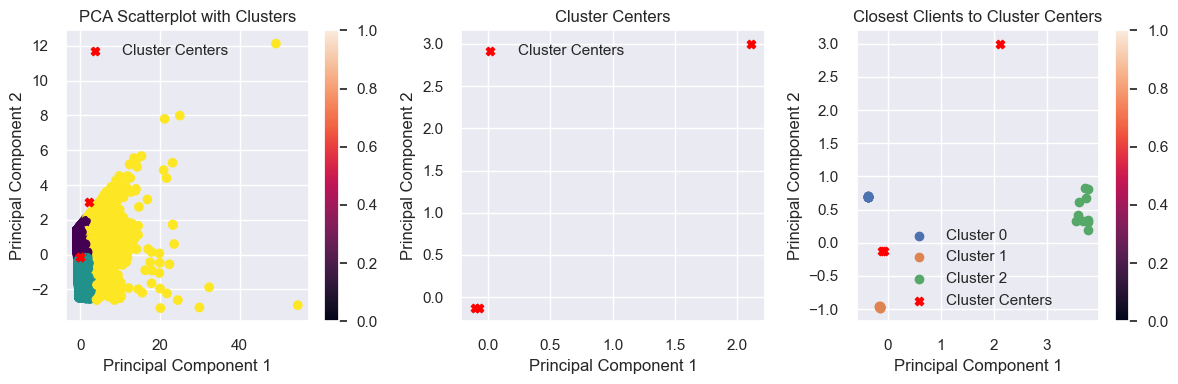

In [424]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# Sélectionner les colonnes RFM pour l'ACP
rfm_data = rfm_df[['frequency', 'monetary_value', 'recency']]

# Normaliser les données
rfm_scaled = (rfm_data - rfm_data.mean()) / rfm_data.std()

# Appliquer l'ACP
pca = PCA(n_components=2)
rfm_pca = pca.fit_transform(rfm_scaled)

# Créer un DataFrame pour les composantes principales
pca_df = pd.DataFrame(data=rfm_pca, columns=['PC1', 'PC2'])

# Appliquer KMeans pour créer 3 clusters
kmeans = KMeans(n_clusters=3, random_state=0)
pca_df['Cluster'] = kmeans.fit_predict(rfm_scaled)

# Obtenir les centroides
centroids = kmeans.cluster_centers_

# Calculer les distances par rapport aux centroids
distances = np.linalg.norm(rfm_scaled.values - centroids[pca_df['Cluster']], axis=1)
pca_df['centroid_distance'] = distances

# Afficher les scatterplots des composantes principales avec couleurs selon les clusters
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Cluster'], cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', color='red', label='Cluster Centers')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Scatterplot with Clusters')
plt.legend()
plt.colorbar()

# Afficher les centroides dans le deuxième subplot
plt.subplot(1, 3, 2)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', color='red', label='Cluster Centers')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Cluster Centers')
plt.legend()

# plt.tight_layout()
# plt.show()

# Afficher les 10 clients les plus proches des centroids de chaque cluster
closest_clients = pca_df.groupby('Cluster').apply(lambda x: x.nsmallest(10, 'centroid_distance'))
# print(closest_clients)
plt.subplot(1, 3, 3)
for cluster in pca_df['Cluster'].unique():
    group = closest_clients[closest_clients['Cluster'] == cluster]
    plt.scatter(group['PC1'], group['PC2'], label=f'Cluster {cluster}')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', color='red', label='Cluster Centers')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Closest Clients to Cluster Centers')
plt.legend()
plt.colorbar()

plt.tight_layout()
plt.show()

last_order                              0
frequency                               0
monetary_value                          0
review_score                            0
satisfaction_status                     0
most_purchased_category                 0
avg_price_in_most_purchased_category    0
max_comment_length                      0
delivery_duration                       0
num_unique_products                     0
customer_state                          0
recency                                 0
mean_monetary_value                     0
Cluster                                 0
dtype: int64


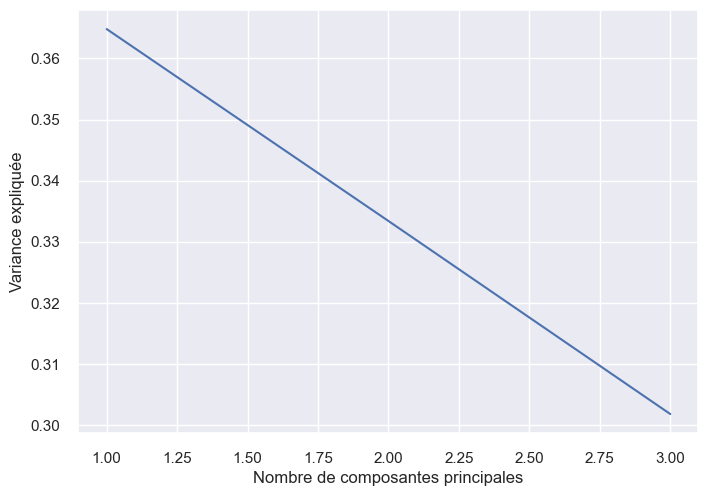

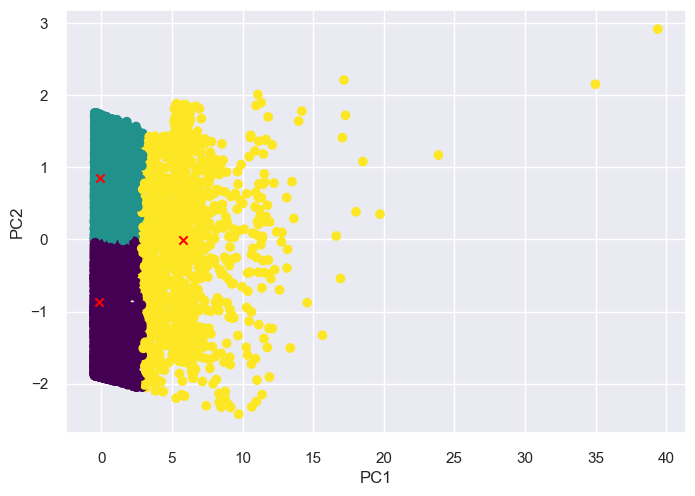

In [423]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# # Charger les données
# df = pd.read_csv('data/data_cleaned_rfm.csv')

# Sélectionner les colonnes numériques
cols = ['frequency', 'monetary_value', 'recency']

# Supprimez les lignes avec des valeurs manquantes (NaN) dans vos données :

df = df.dropna()
# Remplacez les valeurs infinies par des valeurs finies (par exemple, remplacez les valeurs infinies par la moyenne des valeurs non infinies) :

df = df.replace([np.inf, -np.inf], np.nan)
df = df.fillna(df.mean())
# Vérifiez vos données pour vous assurer qu'il n'y a plus de valeurs manquantes ou infinies :

print(df.isnull().sum())  # Vérifier les valeurs manquantes
# print(np.isinf(df).sum())  # Vérifier les valeurs infinies

# Normaliser les données
scaler = StandardScaler()
data = scaler.fit_transform(df[cols])

# Appliquer la PCR
pca = PCA()
pca.fit(data)
data_pca = pca.transform(data)

# Afficher le graphique des composantes principales
# plt.plot(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)
# plt.xlabel('Nombre de composantes principales')
# plt.ylabel('Variance expliquée')
# plt.show()

# Choisir le nombre de composantes principales à conserver
n_components = 2
data_pca = data_pca[:, :n_components]

# Appliquer l'algorithme k-means
kmeans = KMeans(n_clusters=3)
kmeans.fit(data_pca)
labels = kmeans.labels_

# Ajouter les labels au dataframe
df['Cluster'] = labels

# Créer un graphique de dispersion montrant les clusters
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


## T-SNE

utilisons l'algorithme T-SNE pour avoir une idée en première approche du nombre de groupes homogènes

T-SNE (t-Distributed Stochastic Neighbor Embedding) est une technique de réduction de dimension utilisée en apprentissage automatique et en visualisation de données. Son objectif principal est de projeter des données multidimensionnelles dans un espace en deux ou trois dimensions tout en préservant les structures de similarité entre les points.

Résumé :
T-SNE aide à visualiser des données complexes en les réduisant à une dimension inférieure, tout en préservant les relations de similarité entre les points. Cela permet de mieux comprendre la structure et les motifs cachés des données, facilitant ainsi leur analyse et leur interprétation. Il est souvent utilisé pour l'exploration visuelle des données et la détection de groupes ou de clusters.

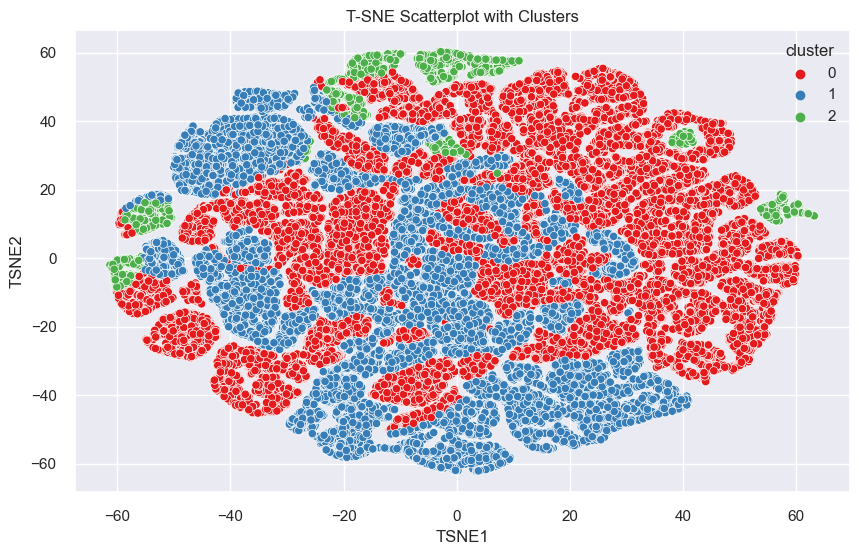

In [428]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

# # Charger les données et effectuer les calculs RFM (simplifié pour cet exemple)
# # Charger vos données et effectuer la segmentation
df_sne = pd.read_csv('data/rfm_total.csv')

# Sélectionner les colonnes RFM pour la normalisation
rfm_data = df_sne[['frequency', 'monetary_value', 'recency']]

# Normaliser les données
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_data)

# Utiliser KMeans pour segmenter les clients en clusters
kmeans = KMeans(n_clusters=3, random_state=42)
rfm_df['cluster'] = kmeans.fit_predict(rfm_scaled)

# Appliquer T-SNE
tsne = TSNE(n_components=2, random_state=42)
rfm_tsne = tsne.fit_transform(rfm_scaled)

# Créer un DataFrame pour les composantes T-SNE
tsne_df = pd.DataFrame(data=rfm_tsne, columns=['TSNE1', 'TSNE2'])

# Ajouter la colonne 'cluster' à tsne_df
tsne_df['cluster'] = rfm_df['cluster']

# Créer un scatterplot des composantes T-SNE en fonction des clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=tsne_df, x='TSNE1', y='TSNE2', hue='cluster', palette='Set1')
plt.title('T-SNE Scatterplot with Clusters')
plt.show()

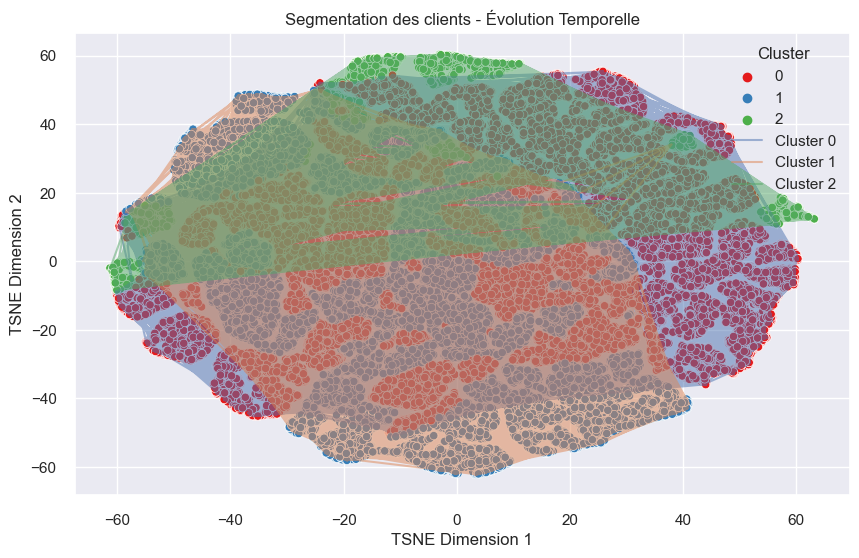

In [436]:
# 8. Évolution Temporelle (si disponible)
# Superposez l'évolution temporelle des clusters à la visualisation T-SNE.
plt.figure(figsize=(10, 6))
sns.scatterplot(data=tsne_df, x='TSNE1', y='TSNE2', hue='cluster', palette='Set1')
plt.title('Segmentation des clients - Évolution Temporelle')
plt.xlabel('TSNE Dimension 1')
plt.ylabel('TSNE Dimension 2')

# Superposez l'évolution temporelle des clusters
for cluster in range(num_clusters):
    cluster_data = tsne_df[tsne_df['cluster'] == cluster]
    plt.plot(cluster_data['TSNE1'], cluster_data['TSNE2'], label=f'Cluster {cluster}', alpha=0.5)

plt.legend(title='Cluster')
plt.show()


In [437]:
# 9. Recommandation de la fréquence de mise à jour
# Analysez comment les points se déplacent d'une période à l'autre pour recommander la fréquence de mise à jour.
# cluster_stability = pd.DataFrame(columns=['cluster', 'stability'])
# for cluster in range(num_clusters):
#     stability = calculate_cluster_stability(cluster)
#     cluster_stability = cluster_stability.append({'cluster': cluster, 'stability': stability}, ignore_index=True)
# print("Cluster Stability:")
# print(cluster_stability)

def calculate_cluster_stability(cluster):
    current_cluster = cluster_stability_df[cluster_stability_df['current_cluster'] == cluster]
    previous_cluster = cluster_stability_df[cluster_stability_df['previous_cluster'] == cluster]
    
    common_customers = set(current_cluster['customer_unique_id']).intersection(previous_cluster['customer_unique_id'])
    stability = len(common_customers) / len(current_cluster['customer_unique_id'])
    
    return stability

num_clusters = 3  # Choisissez le nombre de clusters que vous avez utilisé dans K-Means

# Calculer la stabilité de chaque cluster
cluster_stability_df = pd.DataFrame({'customer_unique_id': rfm_df['customer_unique_id'], 'current_cluster': rfm_df['kmeans_cluster']})
cluster_stability_df['previous_cluster'] = cluster_stability_df.groupby('customer_unique_id')['current_cluster'].shift(1)

cluster_stability = pd.DataFrame(columns=['cluster', 'stability'])
for cluster in range(num_clusters):
    stability = calculate_cluster_stability(cluster)
    cluster_stability = cluster_stability.append({'cluster': cluster, 'stability': stability}, ignore_index=True)

print("Stabilité du cluster :")
print(cluster_stability)

Stabilité du cluster :
   cluster  stability
0      0.0   0.020673
1      1.0   0.016791
2      2.0   0.023175


La stabilité du cluster est une mesure qui évalue dans quelle mesure les clients d'un cluster donné restent cohérents ou stables d'une période à l'autre. Plus précisément, elle mesure le pourcentage de clients qui demeurent dans le même cluster par rapport au nombre total de clients dans ce cluster.

Dans votre cas, voici ce que vous pouvez déduire des résultats :

1. **Cluster 0** : La stabilité est d'environ 2%, ce qui signifie que seulement 2% des clients de ce cluster restent dans ce même cluster entre deux périodes. Cela indique une faible stabilité, ce qui peut signifier que ce cluster est moins cohérent au fil du temps.

2. **Cluster 1** : La stabilité est d'environ 1,7%, ce qui est similaire à Cluster 0. Cela suggère également une faible stabilité pour ce cluster.

3. **Cluster 2** : Ce cluster a une stabilité d'environ 2,3%, ce qui est légèrement supérieur aux deux autres clusters mais reste relativement faible.

Globalement, ces résultats indiquent que les clusters que vous avez définis ne sont pas très stables d'une période à l'autre. Cela peut signifier que les clients ont tendance à changer de comportement d'achat au fil du temps, ce qui pourrait nécessiter une mise à jour fréquente des segments de clientèle ou des stratégies de marketing pour mieux répondre à ces variations.

Cependant, il est important de noter que la stabilité seule ne fournit pas toutes les informations nécessaires pour prendre des décisions. Il est également essentiel de considérer d'autres facteurs, tels que les caractéristiques spécifiques des clients dans chaque cluster, pour comprendre pourquoi les changements se produisent et comment y répondre de manière appropriée.

## DBSCAN

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) est un algorithme de clustering utilisé pour regrouper des points de données en fonction de leur densité dans un espace multidimensionnel. Il identifie les régions denses de points et peut détecter les points isolés en tant que valeurs aberrantes (noise).

En résumé, DBSCAN sert à :

1. Identifier des clusters de points de données basés sur leur proximité et leur densité.
2. Gérer efficacement les valeurs aberrantes en les identifiant comme du bruit.
3. Ne pas exiger de spécifier le nombre de clusters à l'avance, ce qui le rend plus flexible que d'autres algorithmes de clustering.

Il est largement utilisé dans divers domaines, tels que l'analyse de données, la vision par ordinateur et l'apprentissage automatique, pour découvrir des structures cachées dans les données.

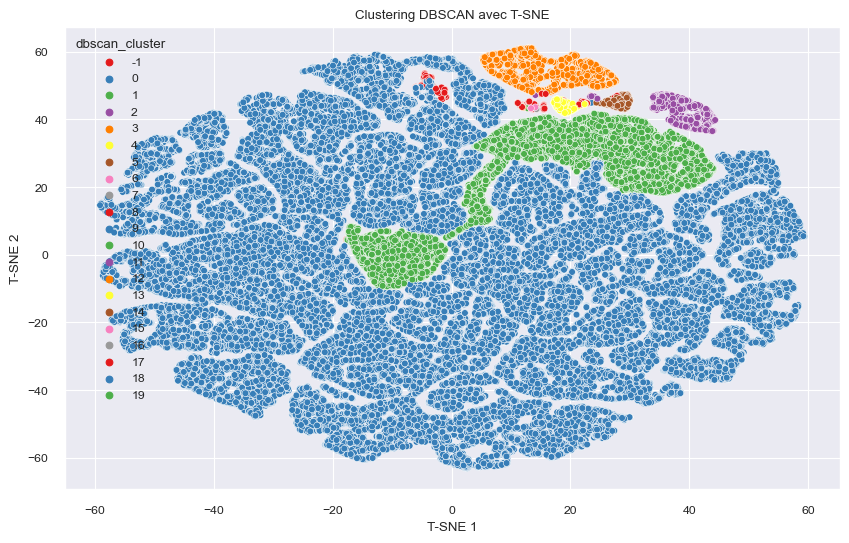

In [231]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns

# Supposons que vous ayez déjà le dataframe rfm_df

# Sélectionnez les colonnes RFM pour l'analyse de clustering
rfm_data = rfm_df[['frequency', 'monetary_value', 'recency']]

# Normalisez les données
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_data)

# Appliquez l'algorithme DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
rfm_df['dbscan_cluster'] = dbscan.fit_predict(rfm_scaled)

# Appliquer T-SNE pour visualiser en 2D
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
rfm_tsne = tsne.fit_transform(rfm_scaled)

# Ajoutez les coordonnées T-SNE à votre dataframe
rfm_df['tsne1'] = rfm_tsne[:, 0]
rfm_df['tsne2'] = rfm_tsne[:, 1]

# Visualisez les clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=rfm_df, x='tsne1', y='tsne2', hue='dbscan_cluster', palette='Set1')
plt.xlabel('T-SNE 1')
plt.ylabel('T-SNE 2')
plt.title('Clustering DBSCAN avec T-SNE')
plt.show()

## Clustering Hiérarchique

Le Clustering Hiérarchique est une technique de regroupement de données qui crée une structure arborescente de clusters, également appelée dendrogramme, en fonction des similitudes entre les données. En résumé, il sert à :

1. Organiser les données en une structure hiérarchique de clusters imbriqués.
2. Permettre une visualisation graphique des relations de similitude entre les données.
3. Ne pas nécessiter de spécification préalable du nombre de clusters.
4. Offrir une compréhension approfondie de la structure des données, en particulier lorsqu'il existe des relations de sous-clusters à différents niveaux.

Cette méthode est couramment utilisée en analyse de données, en biologie pour la classification des espèces, en analyse de texte pour regrouper des documents similaires, et dans d'autres domaines où la structure des données doit être explorée de manière hiérarchique.

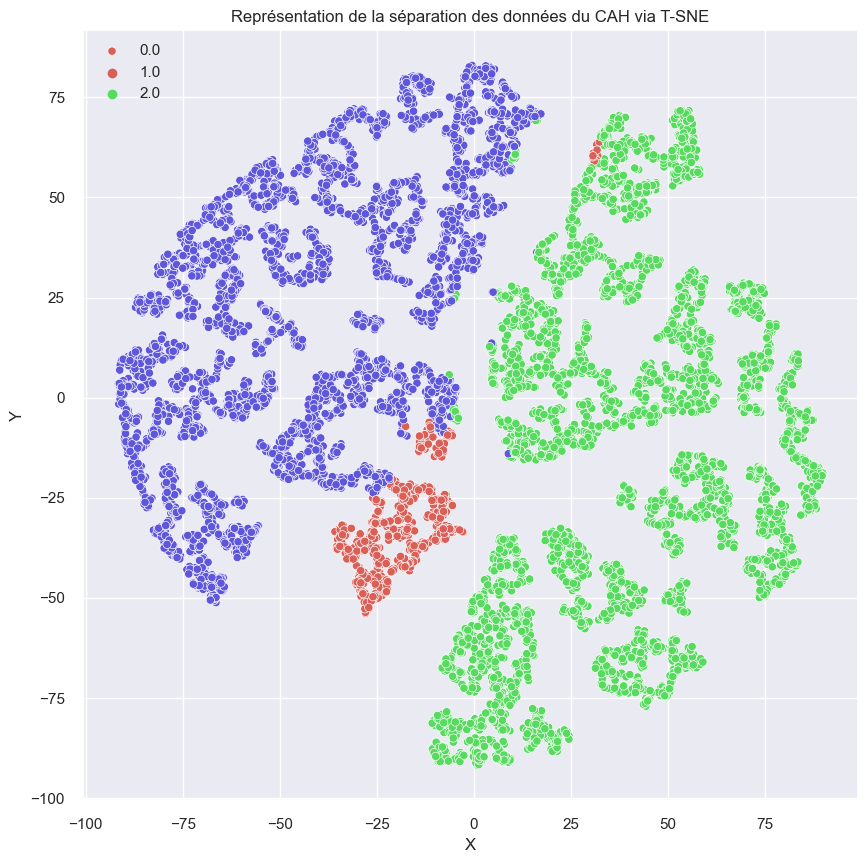

In [447]:
import numpy as np
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

# Calcul des coordonnées T-SNE
tsne = TSNE(n_components=2, random_state=42)
T = tsne.fit_transform(rfm_pca)

# Création du modèle Agglomerative Clustering
nb_clusters_agg = 3  # Nombre de clusters souhaité
cah = AgglomerativeClustering(n_clusters=nb_clusters_agg).fit(rfm_pca.copy())

# # Création du DataFrame graph avec les données T-SNE et les étiquettes de KMeans
# graph = pd.DataFrame(data=[T[:, 0], T[:, 1], kmeans.labels_]).T
# graph.columns = ['X', 'Y', 'label_kmeans']

# # Affichage du graphique avec T-SNE, les étiquettes de CAH et les étiquettes de KMeans
# plt.figure(figsize=(10, 10))
# plt.title('Représentation de la séparation des données du CAH via T-SNE')

# sns.scatterplot(graph['X'], graph['Y'], hue=cah.labels_, legend='full',
#                 palette=sns.color_palette("hls", nb_clusters_agg))

# plt.legend(loc='upper left', labels=graph['label_kmeans'].unique())

# plt.show()

# Création du DataFrame graph avec les données T-SNE et les étiquettes de KMeans
graph = pd.DataFrame(data=[T[:, 0], T[:, 1], cah.labels_]).T
graph.columns = ['X', 'Y', 'label_kmeans']

# Affichage du graphique avec T-SNE, les étiquettes de CAH et les étiquettes de KMeans
plt.figure(figsize=(10, 10))
plt.title('Représentation de la séparation des données du CAH via T-SNE')

sns.scatterplot(graph['X'], graph['Y'], hue=cah.labels_, legend='full',
                palette=sns.color_palette("hls", nb_clusters_agg))

plt.legend(loc='upper left', labels=graph['label_kmeans'].unique())

plt.show()



### Les clients les plus dépensiers

In [459]:
# Trier le dataframe en fonction de la colonne "monetary_value" de manière décroissante
top_spending_customers = rfm_df.sort_values(by='monetary_value', ascending=False)

# Afficher les premières lignes du dataframe pour voir les clients les plus dépensiers
print("Clients les plus dépensiers:")
print(top_spending_customers.head())


In [443]:
# Définissez les seuils pour déterminer les catégories de clients
high_value_threshold = 2000  # Seuil pour les clients importants
low_value_threshold = 500  # Seuil pour les clients moins importants

# Classifiez les clients en trois catégories
rfm_df['customer_category'] = pd.cut(rfm_df['monetary_value'],
                                     bins=[-float("inf"), low_value_threshold, high_value_threshold, float("inf")],
                                     labels=['Mauvais', 'Moyen', 'Importants'])

# Comptez le nombre de clients dans chaque catégorie
customer_category_counts = rfm_df['customer_category'].value_counts()

# Affichez le nombre de clients dans chaque catégorie
print("Nombre de clients importants:", customer_category_counts['Importants'])
print("Nombre de clients moyens:", customer_category_counts['Moyen'])
print("Nombre de clients mauvais:", customer_category_counts['Mauvais'])



Nombre de clients importants: 202
Nombre de clients moyens: 3868
Nombre de clients mauvais: 92925


In [441]:
# 10. Identification des Clients Importants
# Identifiez les clusters qui contiennent les clients les plus importants pour l'entreprise.
threshold_value = 2000  # Définissez le seuil de valeur monétaire pour déterminer les clients importants

important_customers = rfm_df[rfm_df['monetary_value'] > threshold_value]
less_important_customers = rfm_df[rfm_df['monetary_value'] <= threshold_value]

num_important_customers = len(important_customers)
num_less_important_customers = len(less_important_customers)

print("Nombre de clients importants:", num_important_customers)
print("Nombre de clients moins importants:", num_less_important_customers)


Nombre de clients importants: 202
Nombre de clients moins importants: 96793


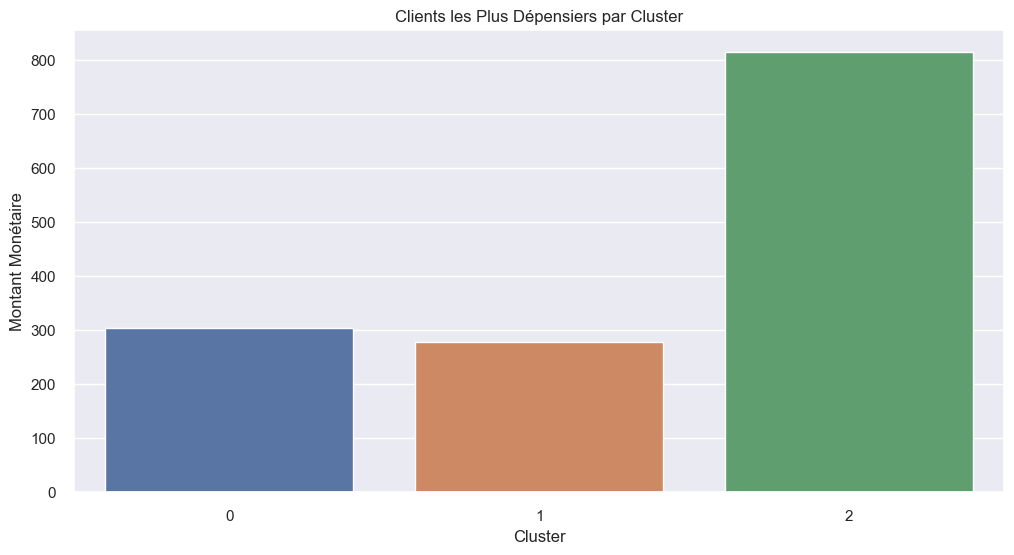

In [450]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Supposons que vous avez déjà le dataframe rfm_df avec les colonnes cluster et monetary_value

# Calculez les seuils pour définir les catégories de clients
top_percentile = 0.1  # 10% des clients les plus dépensiers
bottom_percentile = 0.1  # 10% des clients les moins dépensiers

# Trier les clients par montant monétaire dans chaque cluster
rfm_df = rfm_df.sort_values(by=['cluster', 'monetary_value'], ascending=[True, False])

# Définir les seuils pour chaque cluster
top_threshold = int(len(rfm_df) * top_percentile)
bottom_threshold = int(len(rfm_df) * bottom_percentile)

# Sélectionner les clients les plus et les moins dépensiers dans chaque cluster
top_customers = rfm_df.groupby('cluster').head(top_threshold)
bottom_customers = rfm_df.groupby('cluster').tail(bottom_threshold)

# Créer des graphiques pour les clients les plus et les moins dépensiers par cluster
plt.figure(figsize=(12, 6))
sns.barplot(data=top_customers, x='cluster', y='monetary_value', ci=None)
plt.title('Clients les Plus Dépensiers par Cluster')
plt.xlabel('Cluster')
plt.ylabel('Montant Monétaire')
plt.show()

### Les clients les moins dépensiers

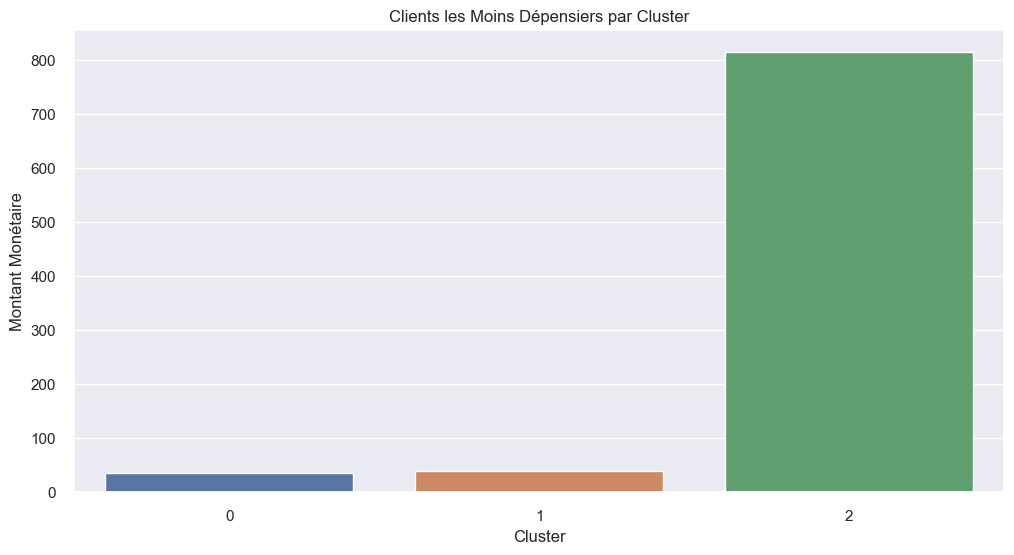

In [451]:
plt.figure(figsize=(12, 6))
sns.barplot(data=bottom_customers, x='cluster', y='monetary_value', ci=None)
plt.title('Clients les Moins Dépensiers par Cluster')
plt.xlabel('Cluster')
plt.ylabel('Montant Monétaire')
plt.show()

### Les clients qui ont acheté le plus grand nombre de produits

In [453]:
rfm_df

customer_unique_id  period  last_order  frequency  \
43815  01ecdc37f767e85f5b3fd2310a289253  201808     94241.0          1   
46168  fcc4e7b7fcfebc7204802b5b797bf993  201808     93343.0          1   
96326  a5c3e82a63848cb08546796194121927  201808     92332.0          1   
83733  918fc1e0f62d6a9c6329dfd85e965e2a  201808     93884.0          1   
76886  f774a1b6de038bc38320ec8751c6df8b  201808     91175.0          1   
...                                 ...     ...         ...        ...   
55561  6bd5b501f37638859ccc1dc94cce730d  201711     33354.0          9   
50272  2bca5fe01d46ab5cc2bc5aaade88d850  201707     17784.0          6   
94377  569aa12b73b5f7edeaa6f2a01603e381  201706     11728.0         26   
5597   2524dcec233c3766f2c2b22f69fd65f4  201712     40049.0         22   
71664  c411c8b6dbaffd467263f87a23f2cf52  201707     14555.0         12   

       monetary_value  total_dep_by_customer  nb_products_buy  \
43815      721.740000                 721.74                1   
46168      718.090000                 718.09                1   
96326      715.340000                 715.34                1   
83733      715.320000                 715.32                1   
76886      714.230000                 714.23                1   
...               ...                    ...              ...   
55561        3.776667                  33.99                9   
50272        3.166667                  19.00                6   
94377        2.410769                  62.68               26   
5597         1.856818                  40.85               22   
71664        1.737500                  20.85               12   

       volume_product_cm3  fav_categ  eval_mean_per_customer  ...  \
43815            131220.0       73.0                     3.0  ...   
46168              4851.0       41.0                     5.0  ...   
96326             23064.0        9.0                     1.0  ...   
83733             42527.0       12.0                     5.0  ...   
76886              3072.0       67.0                     5.0  ...   
...                   ...        ...                     ...  ...   
55561             54000.0       14.0                     5.0  ...   
50272            237600.0       45.0                     5.0  ...   
94377            106496.0       14.0                     5.0  ...   
5597             127072.0       31.0                     5.0  ...   
71664            127500.0       67.0                     4.0  ...   

       fav_payment_type  satisfaction_client  recency  Cluster  cluster  \
43815               1.0                  0.0       17        1        0   
46168               1.0                  1.0       20        0        0   
96326               0.0                  0.0       24        1        0   
83733               1.0                  1.0       18        0        0   
76886               0.0                  1.0       28        0        0   
...                 ...                  ...      ...      ...      ...   
55561               4.0                  1.0      288        2        2   
50272               4.0                  1.0      397        2        2   
94377               4.0                  1.0      450        3        2   
5597                4.0                  1.0      266        3        2   
71664               4.0                  1.0      422        3        2   

       kmeans_cluster  customer_category dbscan_cluster      tsne1      tsne2  
43815               1              Moyen              0 -11.327850  54.512329  
46168               1              Moyen              0 -11.336478  54.444214  
96326               1              Moyen              0 -11.356590  54.378498  
83733               1              Moyen              0 -11.322347  54.409069  
76886               1              Moyen              0 -11.390162  54.330605  
...               ...                ...            ...        ...        ...  
55561               2            Mauvais             -1  60.3

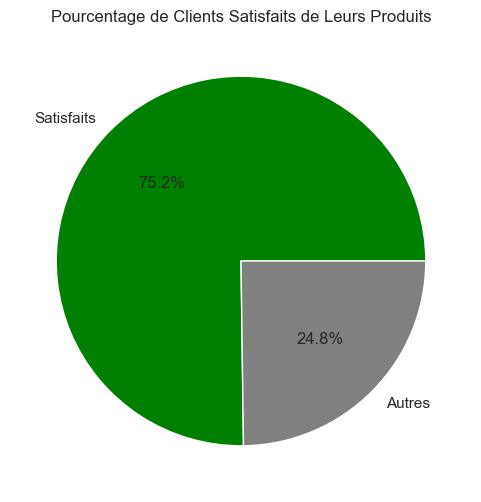

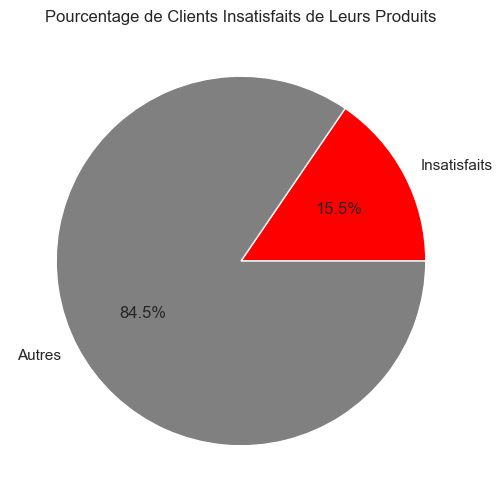

In [460]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Charger les données
# rfm_df_s = pd.read_csv('data/data_cleaned_rfm.csv')  # Assumer que vous avez déjà calculé et nettoyé les RFM

# Calculer le pourcentage de clients satisfaits et insatisfaits
num_customers = len(rfm_df_s)
num_satisfied = rfm_df_s[rfm_df_s['review_score'] >= 4]['customer_unique_id'].nunique()
num_unsatisfied = rfm_df_s[rfm_df_s['review_score'] <= 2]['customer_unique_id'].nunique()

# Créer un graphique pour le pourcentage de clients satisfaits
plt.figure(figsize=(6, 6))
plt.pie([num_satisfied, num_customers - num_satisfied], labels=['Satisfaits', 'Autres'], autopct='%1.1f%%', colors=['green', 'gray'])
plt.title('Pourcentage de Clients Satisfaits de Leurs Produits')
plt.show()

# Créer un graphique pour le pourcentage de clients insatisfaits
plt.figure(figsize=(6, 6))
plt.pie([num_unsatisfied, num_customers - num_unsatisfied], labels=['Insatisfaits', 'Autres'], autopct='%1.1f%%', colors=['red', 'gray'])
plt.title('Pourcentage de Clients Insatisfaits de Leurs Produits')
plt.show()


In [461]:
from sklearn.cluster import KMeans

rfm = rfm_df_s.copy()
# Sélection des caractéristiques pour le clustering
# features_for_clustering = ['recency', 'frequency', 'monetary_value', 'max_comment_length', 'delivery_duration']
features_for_clustering = ['recency', 'frequency', 'monetary_value']

# Création du modèle de clustering
num_clusters = 3  # Nombre de clusters que vous souhaitez créer
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

# Ajuster le modèle sur les caractéristiques sélectionnées
rfm['cluster'] = kmeans.fit_predict(rfm[features_for_clustering])


Pour décrire les clients en fonction des clusters formés par le modèle de clustering, vous pouvez utiliser les centroids de chaque cluster pour définir différents groupes de clients. Voici comment vous pourriez le faire :

1. **Les Bons Clients** : Ce sont ceux qui ont les valeurs les plus élevées pour les caractéristiques associées à un bon comportement d'achat (par exemple, recency faible, frequency élevée, monetary élevée, etc.).

2. **Clients Moyens** : Ce sont ceux qui ont des valeurs proches de la moyenne pour la plupart des caractéristiques.

3. **Mauvais Clients** : Ce sont ceux qui ont des valeurs inférieures à la moyenne pour la plupart des caractéristiques.

Voici comment vous pourriez le mettre en œuvre en Python en utilisant les centroids calculés à partir de votre modèle de clustering (assurez-vous que vous avez déjà effectué le clustering et ajouté la colonne 'cluster' au DataFrame) :


Quant à la mise à jour du modèle de clustering et à la courbe de score ARI (Adjusted Rand Index) avec des données T+n mois, cela implique de re-entraîner votre modèle de clustering sur de nouvelles données et de comparer les résultats avec les clusters précédents. Vous pouvez réaliser cela en utilisant un processus itératif en augmentant progressivement la période de données pour l'entraînement et la période pour les tests.

Pour créer la courbe de score ARI, vous devrez comparer les clusters prédits par le modèle mis à jour avec les clusters prédits précédemment et calculer l'ARI pour chaque itération. Voici comment vous pourriez l'approcher :


In [466]:
# Convertir la colonne 'last_order' en datetime
rfm['last_order'] = pd.to_datetime(rfm['last_order'])


Cette courbe de score ARI vous montrera comment la performance de votre modèle de clustering évolue au fil du temps à mesure que vous mettez à jour les données d'entraînement et de test.

Mauvais    62421
Moyen      30937
Bon         3637
Name: Client_Type, dtype: int64


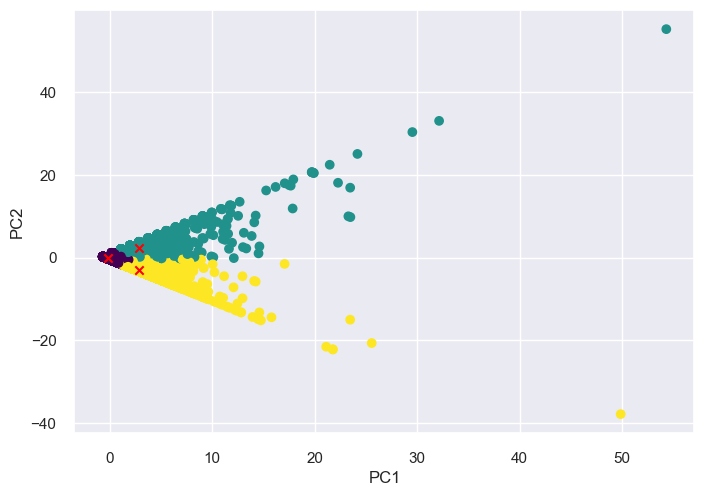

In [471]:
import pandas as pd
import numpy as np  # Assurez-vous d'importer également numpy

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Charger les données
df1 = pd.read_csv('data/rfm_total.csv')

# Sélectionner les colonnes numériques
cols = [ 'frequency', 'monetary_value']

# Supprimer les lignes avec des valeurs manquantes (NaN) dans les données
df1 = df1.dropna()

# Remplacer les valeurs infinies par des valeurs finies (remplacement par la moyenne)
df1 = df1.replace([np.inf, -np.inf], np.nan)
df1 = df1.fillna(df1.mean())  # Remplacez df par df1 ici

# Normaliser les données
scaler = StandardScaler()
data = scaler.fit_transform(df1[cols])  # Remplacez df par df1 ici

# Appliquer l'Analyse en Composantes Principales (PCA)
pca = PCA()
pca.fit(data)
data_pca = pca.transform(data)

# Choisir le nombre de composantes principales à conserver
n_components = 2
data_pca = data_pca[:, :n_components]

# Appliquer l'algorithme K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data_pca)
labels = kmeans.labels_

# Ajouter les labels de cluster au dataframe
df1['Cluster'] = labels  # Remplacez df par df1 ici

# Calculer les centroïdes des clusters
cluster_centroids = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=cols)

# # Associer chaque cluster à un type de client
# def get_client_type(row):
#     cluster_id = row['Cluster']
#     centroid = cluster_centroids.iloc[cluster_id]
    
#     # Comparer les valeurs du client avec les valeurs du centroïde
#     if row['frequency'] >= centroid['frequency'] and row['monetary_value'] >= centroid['monetary_value']:
#         return 'Meilleur'
#     elif row['frequency'] < centroid['frequency'] and row['monetary_value'] < centroid['monetary_value']:
#         return 'Mauvais'
#     elif row['frequency'] >= centroid['frequency'] and row['monetary_value'] < centroid['monetary_value']:
#         return 'Moyen'
#     else:
#         return 'Bon'
# Associer chaque cluster à un type de client
def get_client_type(row):
    cluster_id = row['Cluster']
    centroid = cluster_centroids.iloc[cluster_id]
    
    # Comparer les valeurs du client avec les valeurs du centroïde
    if row['frequency'] >= centroid['frequency'] and row['monetary_value'] >= centroid['monetary_value']:
        return 'Bon'
    elif row['frequency'] < centroid['frequency'] and row['monetary_value'] < centroid['monetary_value']:
        return 'Mauvais'
    else:
        return 'Moyen'


# Appliquer la fonction pour obtenir le type de chaque client
df1['Client_Type'] = df1.apply(get_client_type, axis=1)

# Afficher le nombre de clients dans chaque type
print(df1['Client_Type'].value_counts())

# Créer un graphique de dispersion montrant les clusters et les types de clients
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [472]:
# Groupement des données par cluster
cluster_groups = df1.groupby('Cluster')

# Calcul des statistiques pour chaque groupe
cluster_stats = cluster_groups[['frequency', 'monetary_value']].mean()

# Ajout du nombre de clients dans chaque cluster
cluster_stats['Num_Clients'] = cluster_groups.size()

# Renommer les colonnes pour une meilleure lisibilité
cluster_stats.rename(columns={'frequency': 'Mean_Frequency', 'monetary_value': 'Mean_Monetary_Value'}, inplace=True)

# Afficher le tableau de statistiques
print(cluster_stats)


         Mean_Frequency  Mean_Monetary_Value  Num_Clients
Cluster                                                  
0              1.105078           126.796626        90628
1              4.165689           225.348251         3410
2              1.197497          1041.125157         2957


D'après le tableau de statistiques, il semble que vos données ont été segmentées en trois clusters (Cluster 0, Cluster 1 et Cluster 2) à l'aide de l'algorithme de clustering. Voici quelques observations à partir de ces statistiques :

1. **Mean_Frequency (Fréquence Moyenne)** : Cette colonne indique la fréquence moyenne des achats pour chaque cluster. Le Cluster 1 a la fréquence moyenne la plus élevée (4.17), ce qui signifie que les clients de ce cluster font des achats plus fréquemment que les autres. Les Clusters 0 et 2 ont des fréquences moyennes plus faibles (environ 1.10 et 1.20 respectivement).

2. **Mean_Monetary_Value (Valeur Monétaire Moyenne)** : Cette colonne montre la valeur monétaire moyenne des achats pour chaque cluster. Le Cluster 2 a la valeur monétaire moyenne la plus élevée (environ 1041.13), ce qui suggère que les clients de ce cluster dépensent davantage par achat. Les Clusters 0 et 1 ont des valeurs monétaires moyennes plus faibles.

3. **Num_Clients (Nombre de Clients)** : Cette colonne indique le nombre de clients dans chaque cluster. Le Cluster 0 a le plus grand nombre de clients (90628), suivi du Cluster 2 (2957) et enfin du Cluster 1 (3410).

En conclusion, vous pouvez dire que :
- Le Cluster 1 représente un groupe de clients qui font des achats fréquents avec une fréquence moyenne élevée.
- Le Cluster 2 représente un groupe de clients qui dépensent davantage par achat avec une valeur monétaire moyenne élevée.
- Le Cluster 0 représente la majorité des clients, mais ils ont tendance à avoir des fréquences et des valeurs monétaires moyennes plus faibles par rapport aux autres clusters.

Ces informations peuvent être utiles pour personnaliser vos stratégies marketing en fonction du comportement d'achat de chaque segment de clients. Par exemple, vous pourriez cibler le Cluster 1 avec des promotions pour encourager leurs achats fréquents, tandis que pour le Cluster 2, vous pourriez envisager des offres haut de gamme pour capitaliser sur leur plus grande dépense moyenne. Pour le Cluster 0, vous pourriez développer des incitations visant à augmenter leur fréquence d'achat.

Cependant, on peux prendre en compte les observations suivantes :

- Le Cluster 1 a la fréquence moyenne la plus élevée, ce qui pourrait indiquer un groupe de clients actifs. Cependant, cela ne signifie pas nécessairement qu'ils sont "bons" clients, car la valeur monétaire moyenne de ce cluster n'est pas la plus élevée.

- Le Cluster 2 a la valeur monétaire moyenne la plus élevée, suggérant qu'il s'agit d'un groupe de clients dépensant davantage. Cependant, cela ne signifie pas automatiquement qu'ils sont "bons" clients en termes de fréquence d'achat.

- Le Cluster 0 est le plus peuplé, mais il a des valeurs moyennes plus faibles pour la fréquence et la valeur monétaire.

Pour attribuer des étiquettes comme "bon", "mauvais" ou "moyen" client à chaque cluster, vous devrez peut-être effectuer une analyse plus approfondie, en utilisant d'autres caractéristiques ou en définissant des seuils spécifiques pour la fréquence et la valeur monétaire en fonction de vos propres critères commerciaux. Par exemple, vous pourriez considérer les clients du Cluster 2 comme "bons" en raison de leur dépense élevée, les clients du Cluster 0 comme "moyens" en raison de leur fréquence moyenne et les clients du Cluster 1 comme "actifs" en raison de leur fréquence élevée, mais cela dépend de votre contexte et de vos objectifs.

In [473]:
# Charger les données (à remplacer par le chargement de vos données)
# df = pd.read_csv('data/data_cleaned_rfm.csv')

# Sélectionner les colonnes numériques
cols = ['frequency', 'monetary_value']

# Appliquer l'algorithme K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data_pca)
labels = kmeans.labels_

# Créer un tableau croisé pour le détail des types de clients dans chaque cluster
cluster_client_type_detail = df1.groupby(['Cluster', 'Client_Type']).size().unstack(fill_value=0)

# Afficher le tableau croisé
print(cluster_client_type_detail)

Client_Type   Bon  Mauvais  Moyen
Cluster                          
0            3454    60687  26487
1             145     1734   1531
2              38        0   2919


In [474]:
# # Associer chaque cluster à un type de client
# def get_client_type(row):
#     cluster_id = row['Cluster']
#     centroid = cluster_centroids.iloc[cluster_id]
    
#     # Comparer les valeurs du client avec les valeurs du centroïde
#     if row['frequency'] >= centroid['frequency'] and row['monetary_value'] >= centroid['monetary_value']:
#         return 'Meilleur'
#     elif row['frequency'] < centroid['frequency'] and row['monetary_value'] < centroid['monetary_value']:
#         return 'Mauvais'
#     elif row['frequency'] >= centroid['frequency'] and row['monetary_value'] < centroid['monetary_value']:
#         return 'Moyen'
#     elif row['frequency'] < centroid['frequency'] and row['monetary_value'] >= centroid['monetary_value']:
#         return 'Bon'
#     else:
#         return 'Autre'
# Associer chaque cluster à un type de client
def get_client_type(row):
    cluster_id = row['Cluster']
    centroid = cluster_centroids.iloc[cluster_id]
    
    # Comparer les valeurs du client avec les valeurs du centroïde
    if row['frequency'] >= centroid['frequency'] and row['monetary_value'] >= centroid['monetary_value']:
        return 'Bon'
    elif row['frequency'] < centroid['frequency'] and row['monetary_value'] < centroid['monetary_value']:
        return 'Mauvais'
    else:
        return 'Moyen'
# Appliquer la fonction pour obtenir le type de chaque client
df1['Client_Type'] = df1.apply(get_client_type, axis=1)

# Afficher le nombre de clients dans chaque type
print(df1['Client_Type'].value_counts())


Mauvais    62421
Moyen      30937
Bon         3637
Name: Client_Type, dtype: int64


In [476]:
# Analyse des valeurs de l'indice ARI pour chaque période de mise à jour
for i, period in enumerate(update_periods):
    print(f"Période de mise à jour : {period}")
    print(f"Score ARI : {ari_scores[i]}")
    print("-------------------------------")

Période de mise à jour : 2017-01-01 00:00:00
Score ARI : 0.05517390631864726
-------------------------------
Période de mise à jour : 2017-03-02 00:00:00
Score ARI : 0.3231220882861668
-------------------------------
Période de mise à jour : 2017-05-01 00:00:00
Score ARI : 1.0
-------------------------------
Période de mise à jour : 2017-06-30 00:00:00
Score ARI : 1.0
-------------------------------
Période de mise à jour : 2017-08-29 00:00:00
Score ARI : 1.0
-------------------------------


Les hyperparamètres sont des paramètres qui ne sont pas appris par le modèle lui-même, mais qui doivent être définis par l'utilisateur avant l'entraînement du modèle. Ils affectent la façon dont le modèle est entraîné et influencent sa performance. Le choix des hyperparamètres appropriés peut avoir un impact significatif sur la qualité du modèle.

Dans le code que j'ai fourni précédemment, voici où se trouvent les hyperparamètres pour chaque algorithme :

1. **K-Means** :
   - `n_clusters`: C'est l'hyperparamètre qui spécifie le nombre de clusters que vous voulez que K-Means crée. Dans l'exemple, il est défini à 3. Vous pouvez choisir différents nombres de clusters en fonction de votre problème.

2. **DBSCAN** :
   - `eps`: C'est l'hyperparamètre qui définit la distance maximale entre deux échantillons pour qu'ils soient considérés dans le même cluster. Dans l'exemple, il est défini à 0,5. Vous devez ajuster cette valeur en fonction de la densité de vos données.
   - `min_samples`: C'est l'hyperparamètre qui définit le nombre minimum d'échantillons dans un voisinage pour qu'un échantillon soit considéré comme un noyau. Il est défini à 5 dans l'exemple.

3. **Clustering Hiérarchique** :
   - `n_clusters`: C'est l'hyperparamètre qui spécifie le nombre de clusters que vous voulez créer. Dans l'exemple, il est également défini à 3. Vous pouvez choisir différents nombres de clusters en fonction de vos besoins.

Le choix des hyperparamètres appropriés dépend de la nature de vos données et de l'objectif de votre clustering. Vous pouvez ajuster ces valeurs pour obtenir les meilleurs résultats possibles. Cela peut nécessiter des essais et des erreurs ainsi que des techniques telles que la recherche par grille ou la validation croisée pour déterminer les hyperparamètres optimaux.

Par exemple, dans le cas de K-Means, vous pouvez essayer différentes valeurs pour `n_clusters` et évaluer la performance du modèle en utilisant des mesures comme le score de silhouette. Vous choisissez ensuite la valeur qui donne les meilleurs résultats. Pour DBSCAN, vous ajustez `eps` en fonction de la densité de vos données.

En fin de compte, le choix des hyperparamètres dépendra de votre compréhension du problème et de votre connaissance des données que vous traitez. Il est généralement conseillé d'explorer différentes valeurs pour trouver celles qui fonctionnent le mieux pour votre tâche de clustering spécifique.